<a href="https://colab.research.google.com/github/fatema373/Bank-System/blob/main/MINIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST dataset** 
Is a large dataset of handwritten digits that is commonly used for training various image processing systems.

*   At first we upload the training, testing data, labels and convert it to 2D numby arrays for each. 

*   then we split each image 2d array(28,28) into 16 blocks each block has 7*7 pixels so each image's shape is (16,7,7) 
  
  *    then, i create a centroid_block function take a block and calc. the centre ,
  create centroid_image function take an image and call the centroid_block function return a list of centroid image 

  *   create a function take a list of images which reshapped into (16,7,7)
  call the function centroid_image and return a list of centroid images





# KNN MODEL:

  *   For each testing point we need to calc. all destances that is between testing point and all training points.

  *   Choose the smallest K destances.

  *   Classify the testing point according to the major class.

  *   Build accuracy function and it detect if the predicted label for each point equal to it's actual label or not.
  *   best accuracy at k=3 which is 88.46% training sample = 30000 and testing sample = 5000.

#Gathering data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from keras.datasets import mnist

In [ ]:
# download dataset
(x_train,y_train),(x_test,y_test) =mnist.load_data()
x_valid = x_train[0:30000]
y_valid = y_train[0:30000]

x_testing = x_test[0:5000]
y_testing = y_test[0:5000]

#show the nD of the data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Reshapping the image and return a list of rashapped images

In [ ]:
# function to split the image into blocks -_-
def reshaped_img(img):
  reshapped_image=[]

  for i in range(0,img.shape[0],7):
    for j in range(0,img.shape[1],7):
      reshapped_image.append(img[i:i+7,j:j+7])
      
  return reshapped_image

# images after processing
def processed_img(x_valid):
  list_of_reshaped_imgs=[]

  for i in x_valid:
    list_of_reshaped_imgs.append(reshaped_img(i))

  return np.array(list_of_reshaped_imgs)

#images before centered at its each block
list_before_centerd_train = processed_img(x_valid)
list_before_centerd_test = processed_img(x_testing)
print(list_before_centerd_train.shape)
print(list_before_centerd_test.shape)

# function to get the centre of each block 
def center_of_each_block(block):
  x_centre=0
  sum=0
  y_centre=0

  for row in range(7):
    for col in range(7):
      x_centre+=row*block[row][col]
      y_centre+=col*block[row][col]
      sum+=block[row][col]

  if(sum==0):
    x_centre=0
    y_centre=0
  else:
    x_centre/=sum
    y_centre/=sum  

  return x_centre,y_centre

# function to get the a centre of each block of image's blocks
def centre_of_image_blocks(img):
  centroid_list=[]

  for block in img:
    x,y=center_of_each_block(block)
    centroid_list.append(x)
    centroid_list.append(y)

  return np.array(centroid_list)

# function to get a list of preprocessed images 
def center_of_images_blocks(x):
  centroid_list_of_all_imgs=list()

  for img in x:
    centroid_list_of_all_imgs.append(centre_of_image_blocks(img))

  return np.array(centroid_list_of_all_imgs)

train_features=center_of_images_blocks(list_before_centerd_train)
test_features=center_of_images_blocks(list_before_centerd_test)

(30000, 16, 7, 7)
(5000, 16, 7, 7)


#KNN Model


In [ ]:
def distance(x,y):
    return np.sqrt(np.sum(np.square(x-y)))


def knn(X,Y,testPoint,k):
    
    vals = []
    m = X.shape[0]
    

    for i in range(m):
        d = distance(testPoint,X[i])
        vals.append([d,Y[i]])
        
    
    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)
    # print(vals.shape)

    freq = np.unique(vals[:,1],return_counts=True)
    index = freq[1].argmax()
    pred = freq[0][index]
    
    return pred


def accuracy_pred_Errors(test_points, test_label, train_data, train_label, k):
    cnt = 0
    pred = []
    error=[]
    ind = 0

    for point, lab in zip(test_points,test_label):
        pred.append(knn(train_data, train_label, point, k))
        if pred[ind] == lab:
            cnt += 1
        else:
          error.append(ind)
        ind+=1
        
    return (cnt/len(test_label)*100),error


k_val=np.arange(1,20,2);
for i in k_val:
  acc,error = accuracy_pred_Errors(test_features,y_testing,train_features,y_valid,i)
  print(acc)

88.44
88.46000000000001
88.08
87.7
86.96000000000001
86.58
86.28
85.72
85.3
84.76


#Best k at 3 and print pictures which is wrong predicted

In [ ]:
acc,error = accuracy_pred_Errors(test_features,y_testing,train_features,y_valid,i)

(5000,)
best accauracy = 84.76
wrong pridection photo = 762


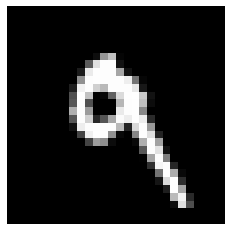

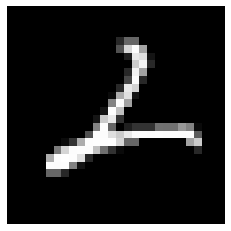

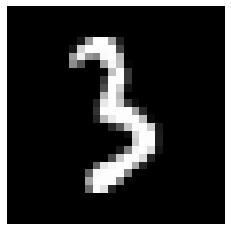

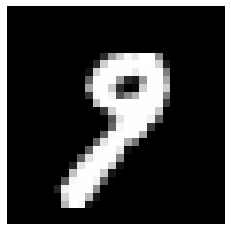

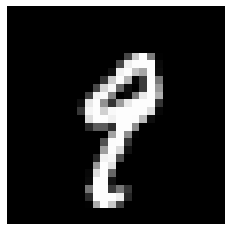

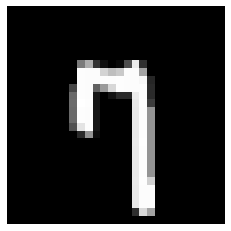

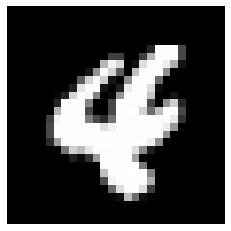

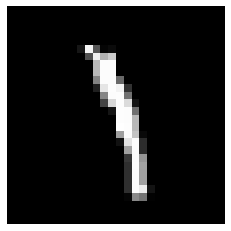

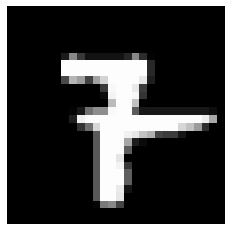

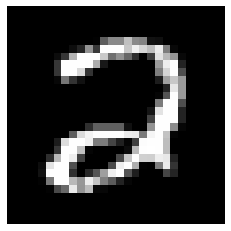

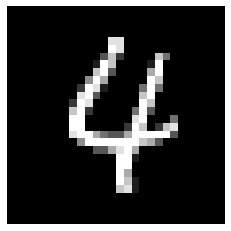

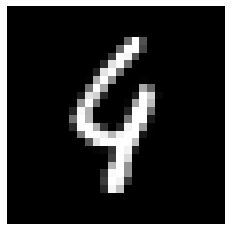

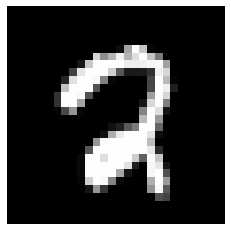

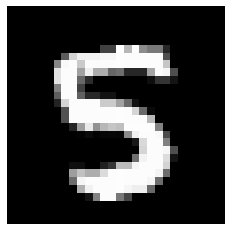

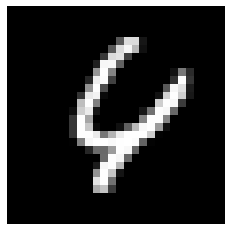

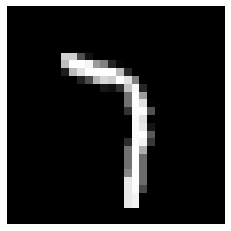

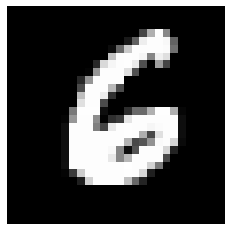

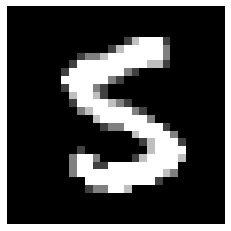

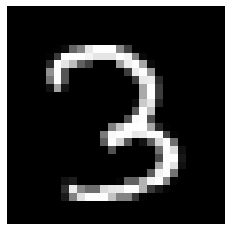

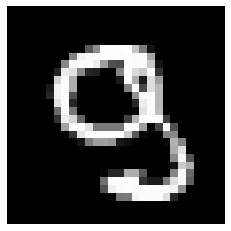

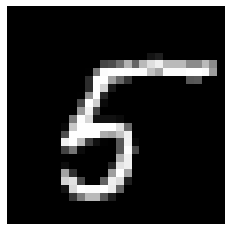

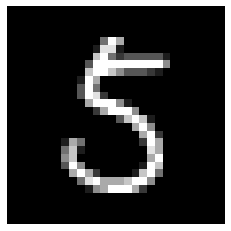

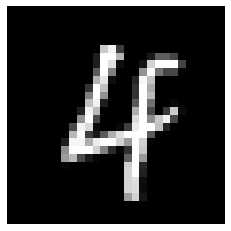

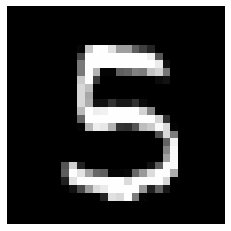

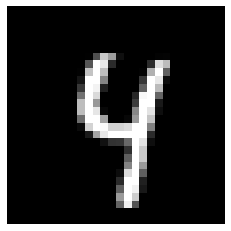

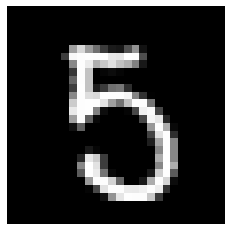

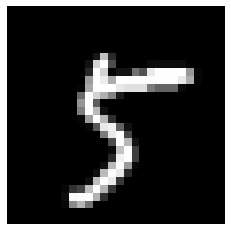

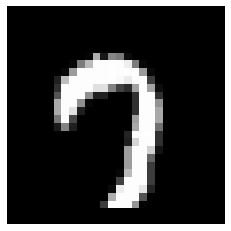

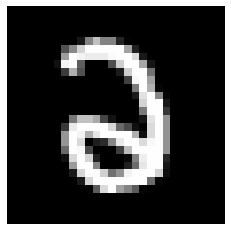

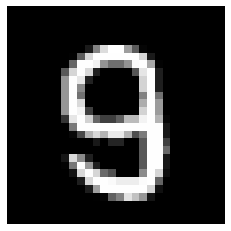

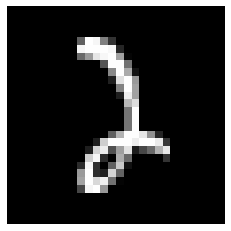

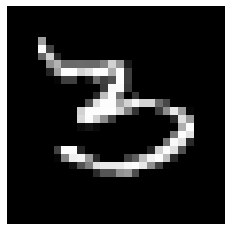

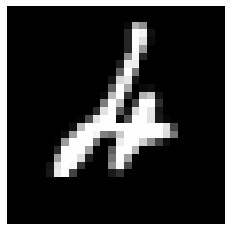

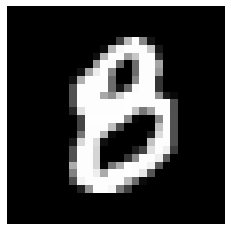

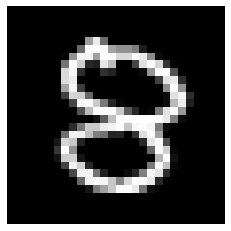

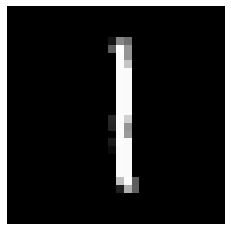

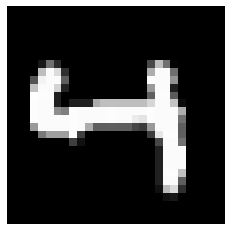

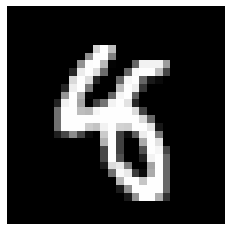

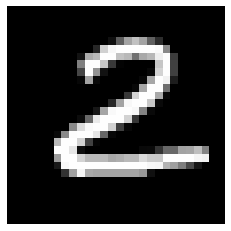

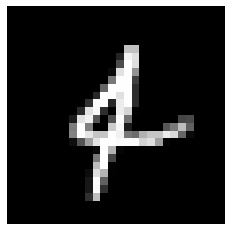

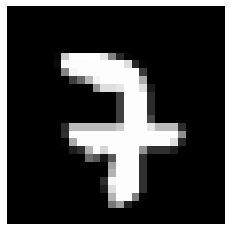

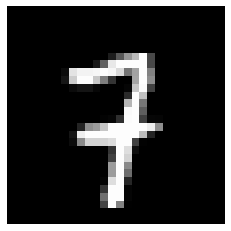

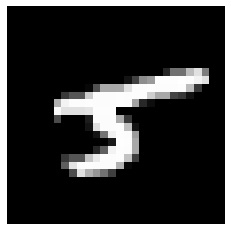

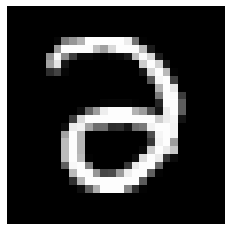

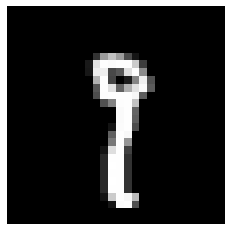

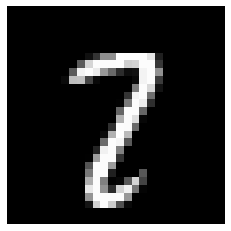

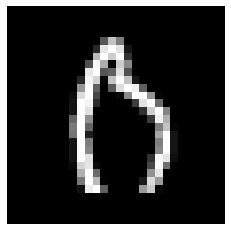

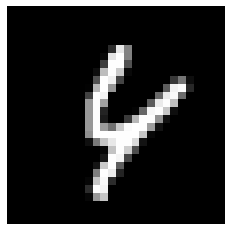

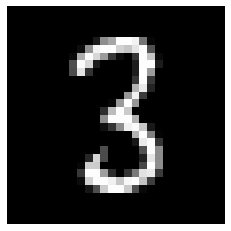

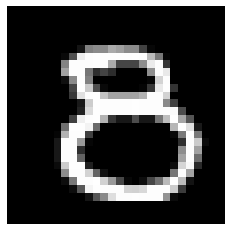

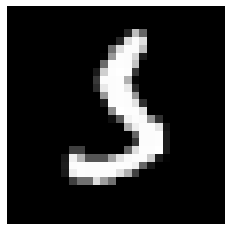

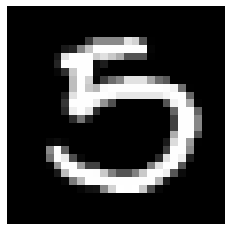

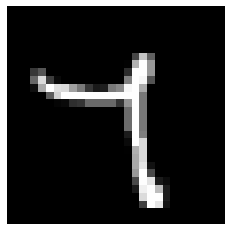

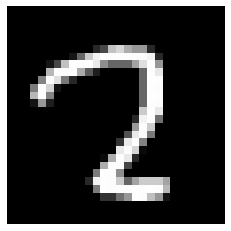

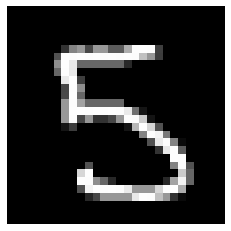

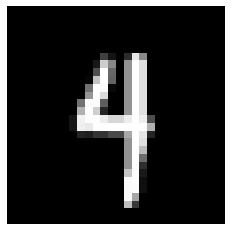

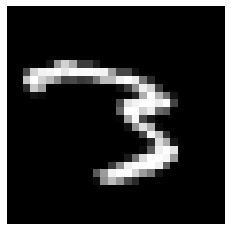

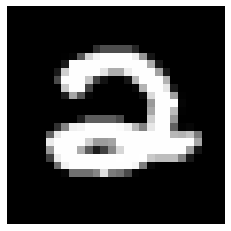

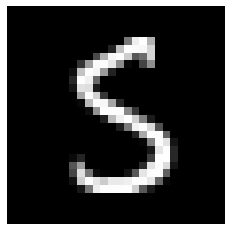

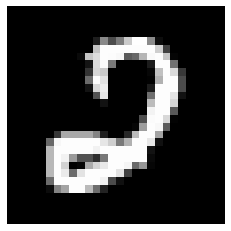

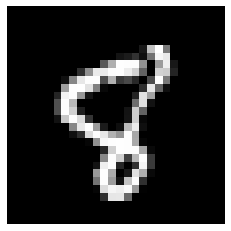

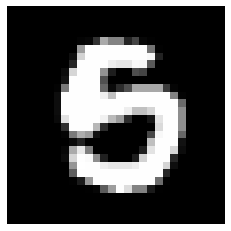

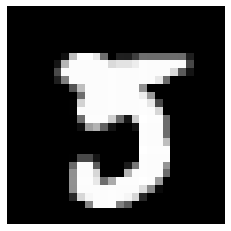

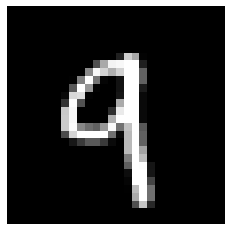

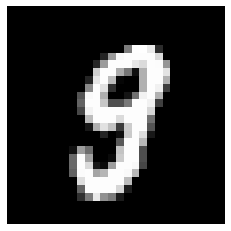

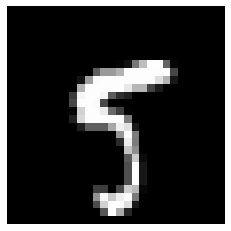

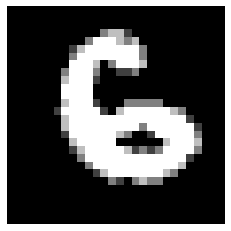

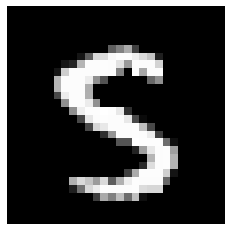

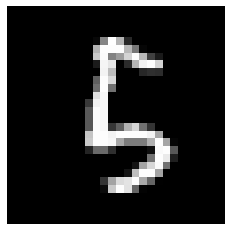

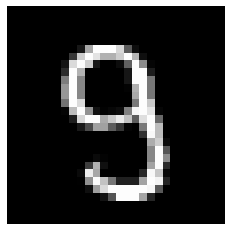

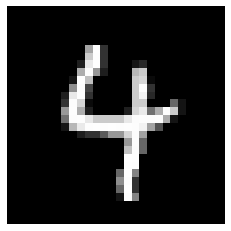

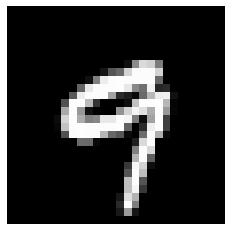

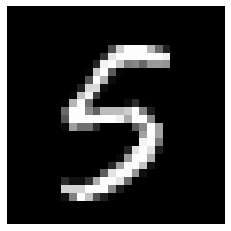

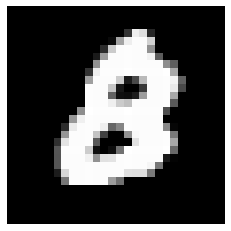

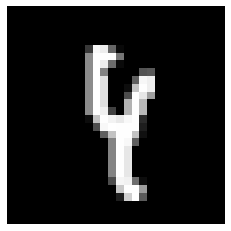

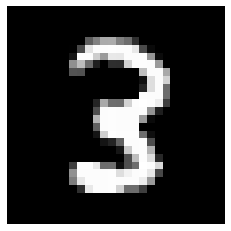

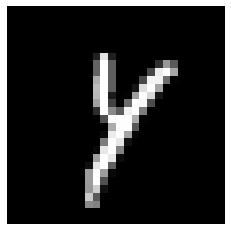

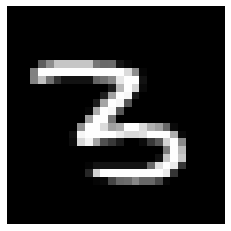

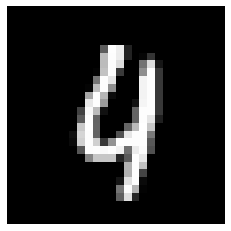

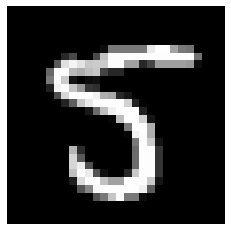

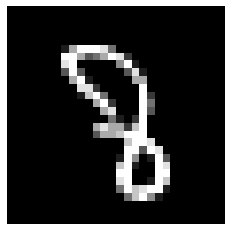

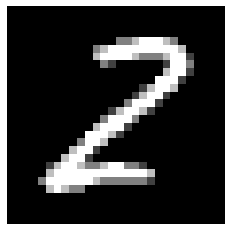

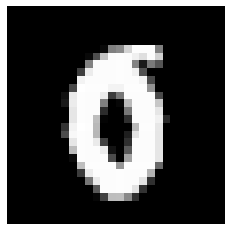

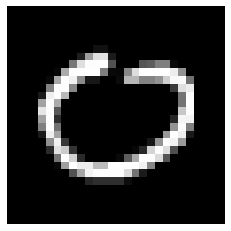

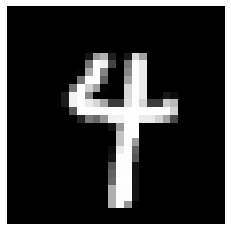

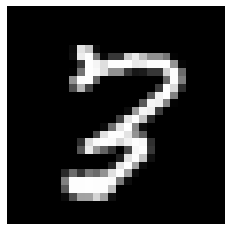

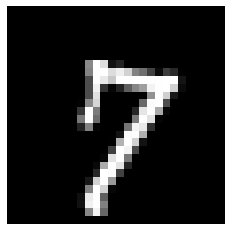

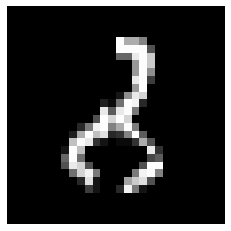

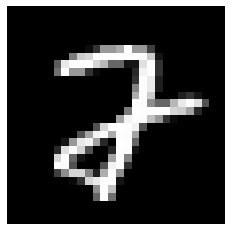

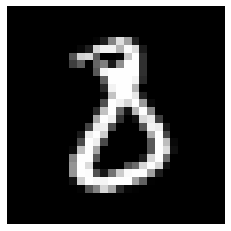

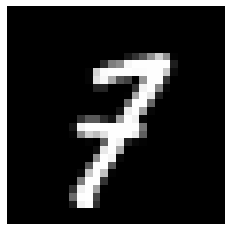

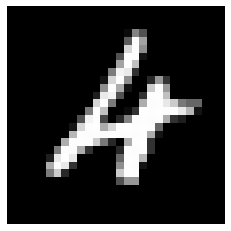

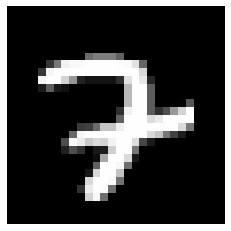

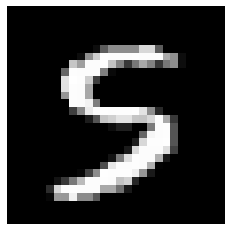

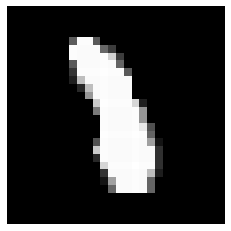

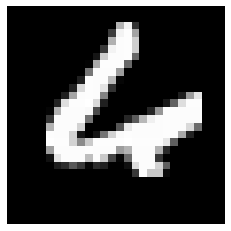

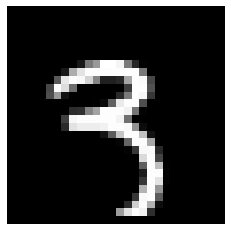

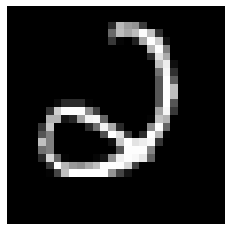

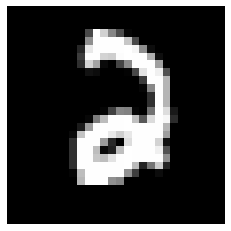

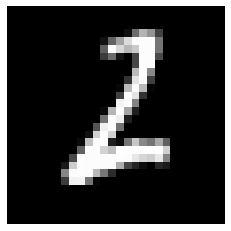

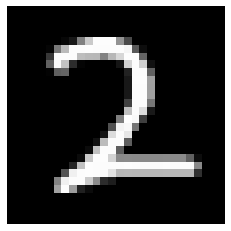

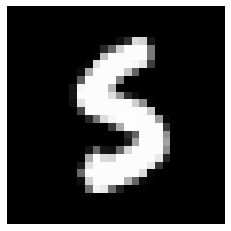

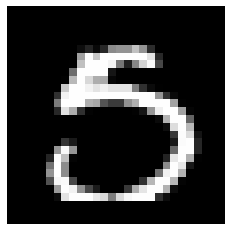

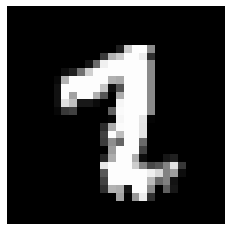

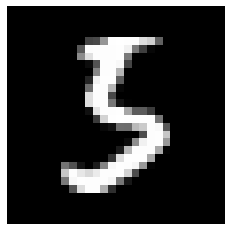

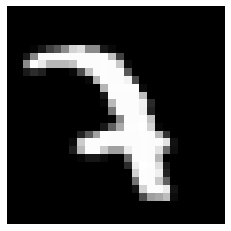

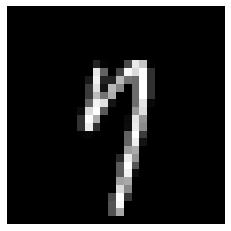

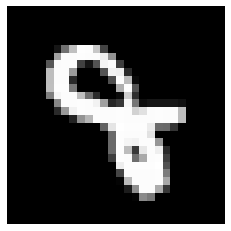

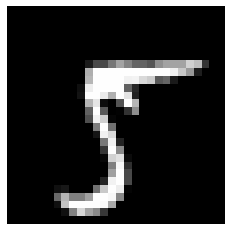

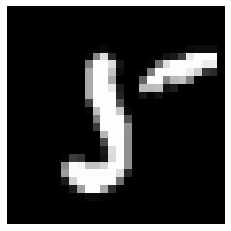

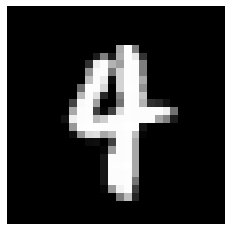

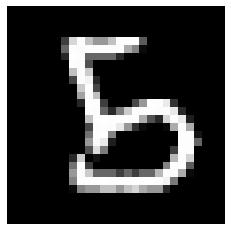

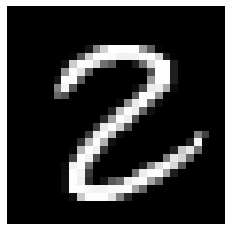

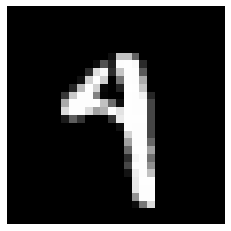

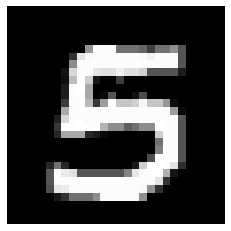

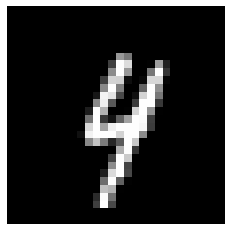

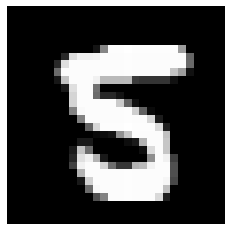

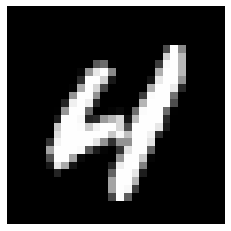

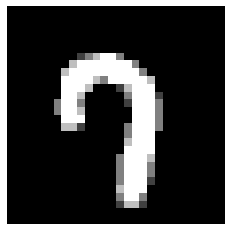

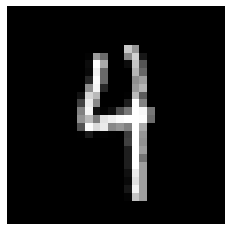

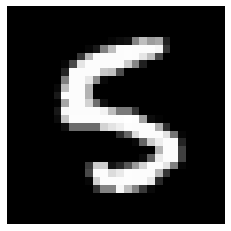

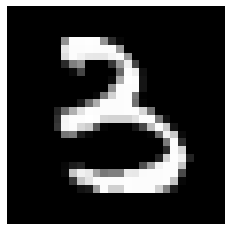

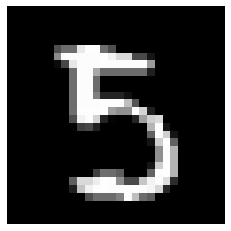

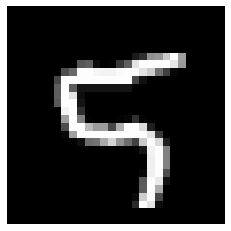

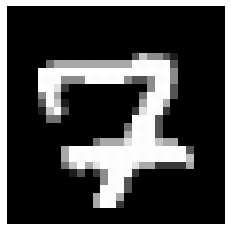

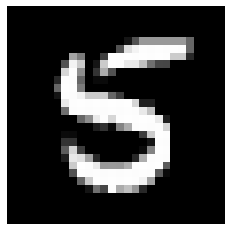

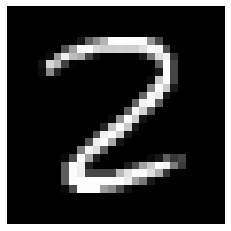

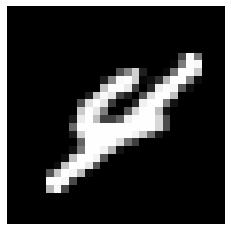

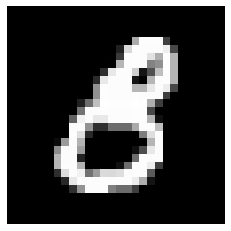

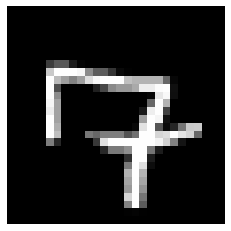

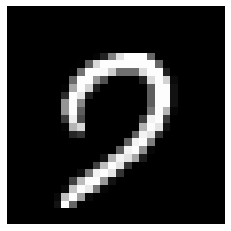

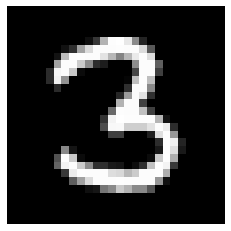

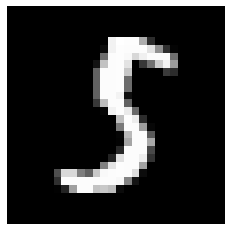

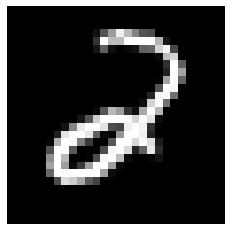

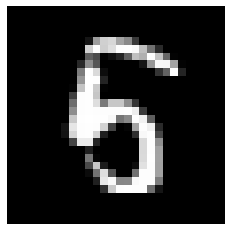

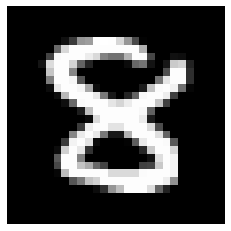

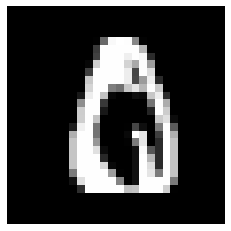

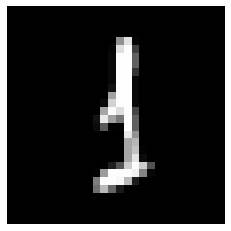

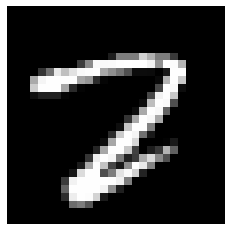

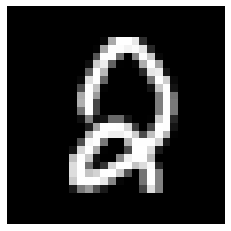

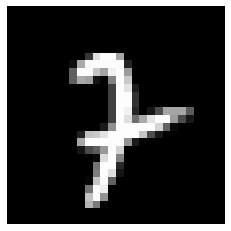

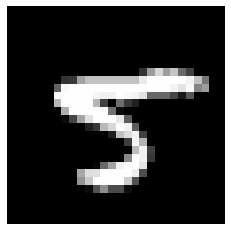

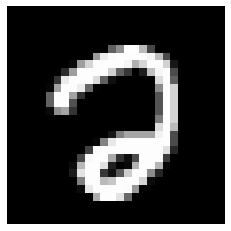

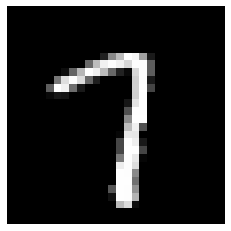

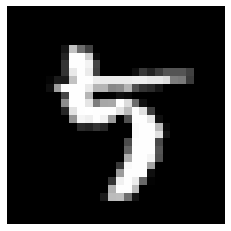

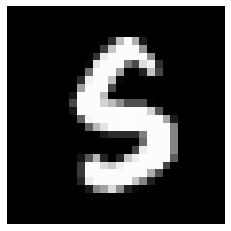

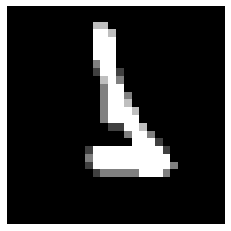

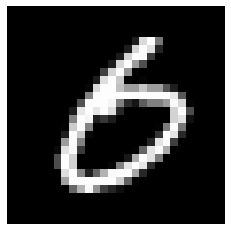

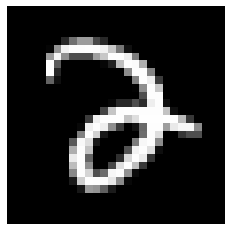

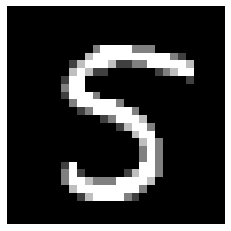

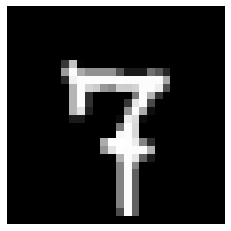

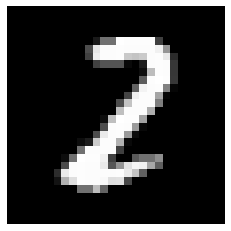

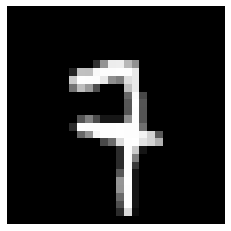

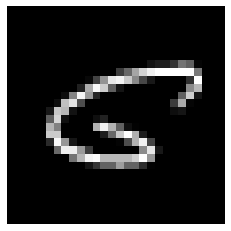

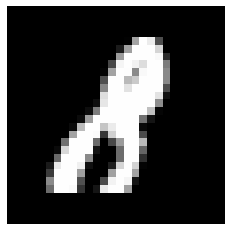

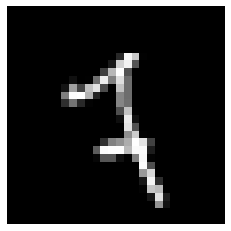

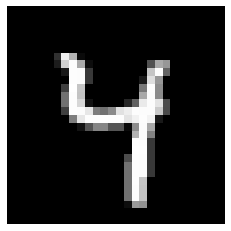

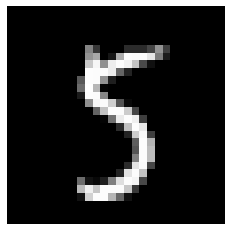

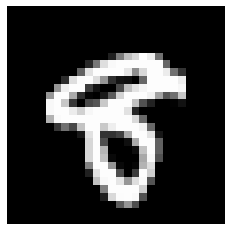

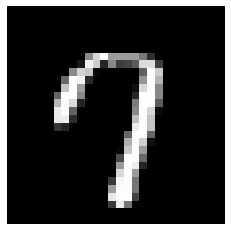

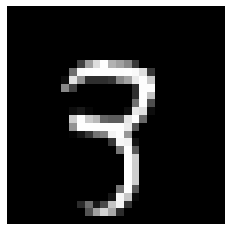

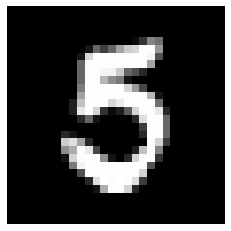

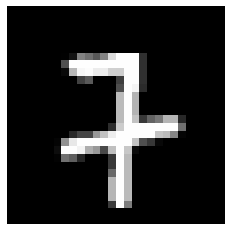

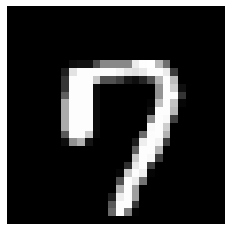

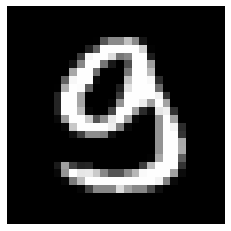

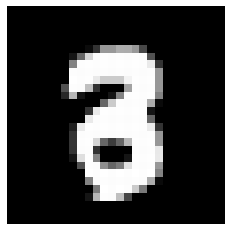

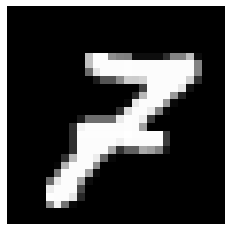

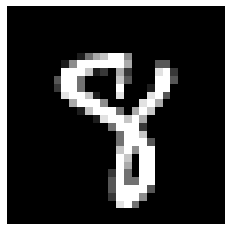

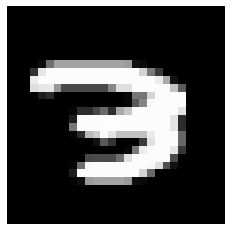

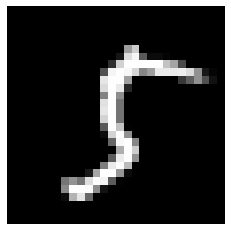

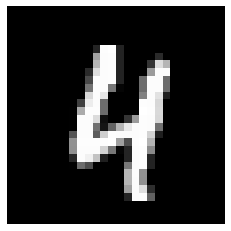

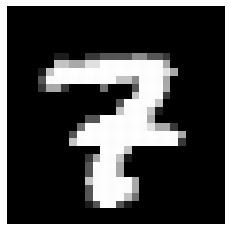

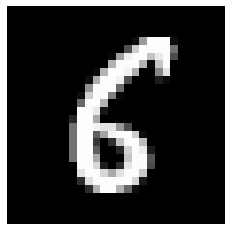

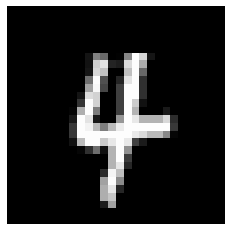

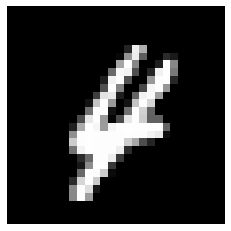

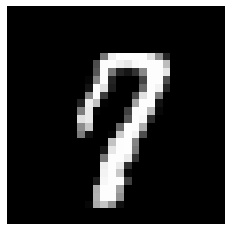

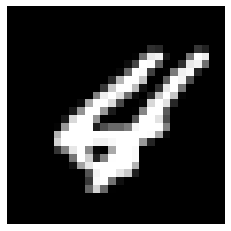

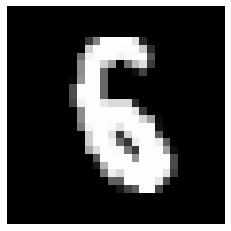

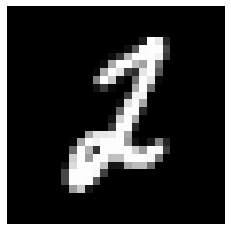

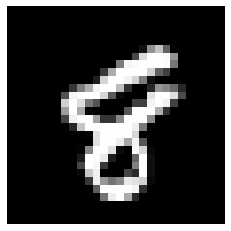

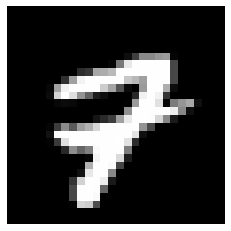

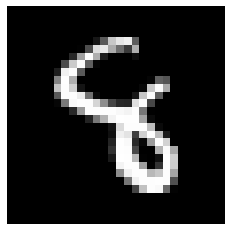

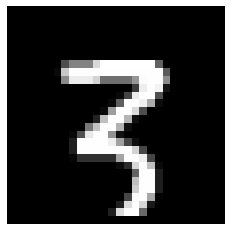

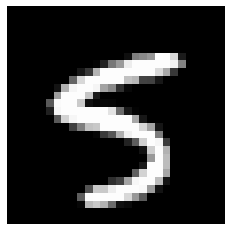

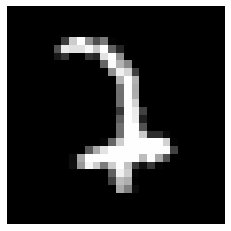

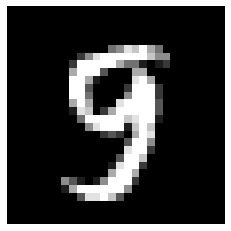

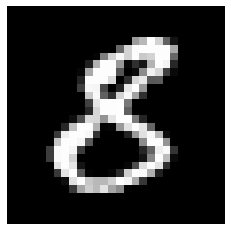

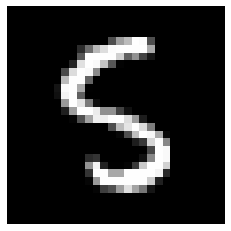

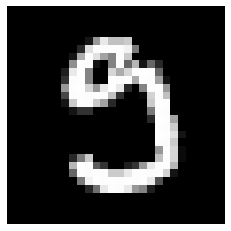

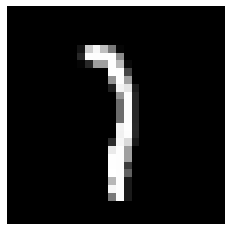

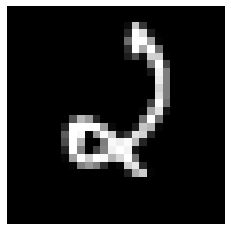

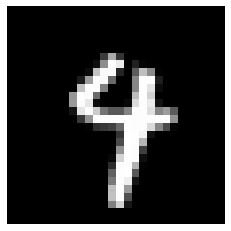

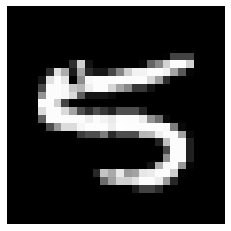

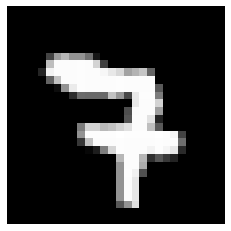

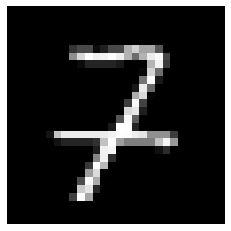

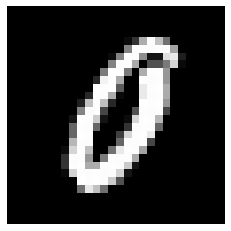

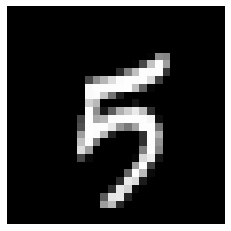

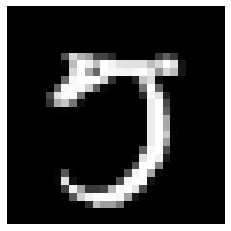

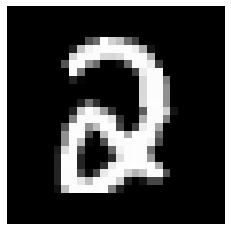

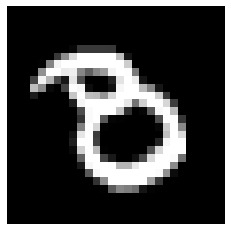

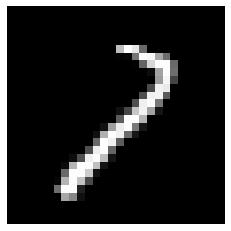

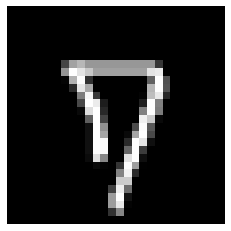

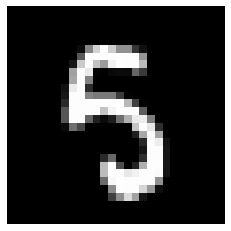

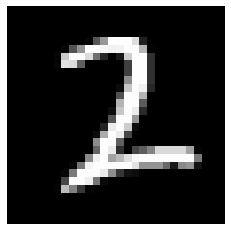

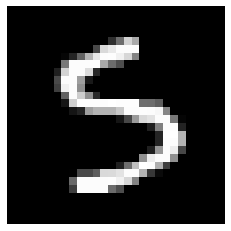

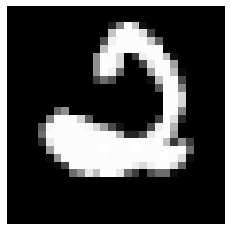

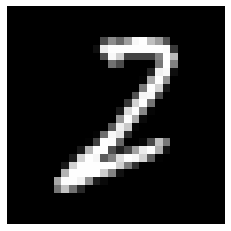

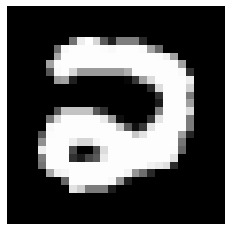

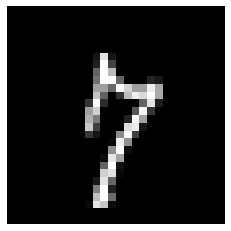

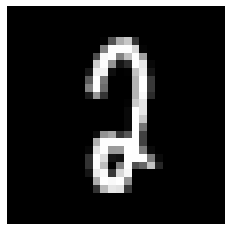

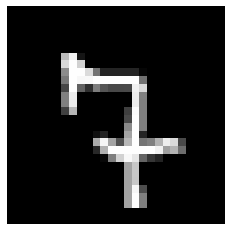

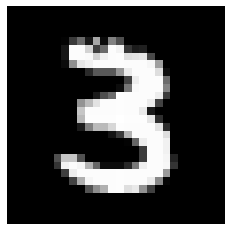

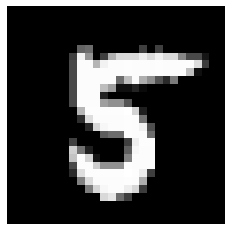

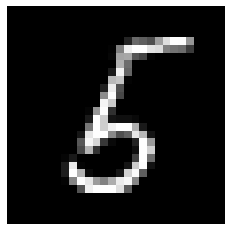

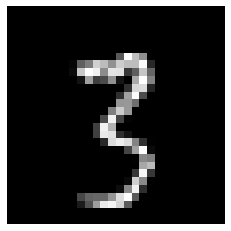

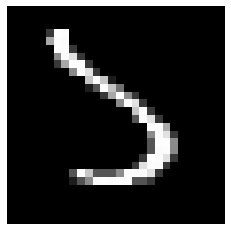

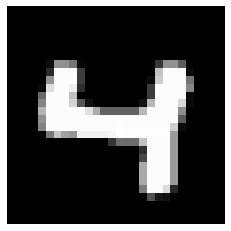

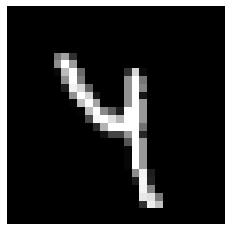

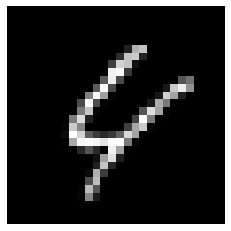

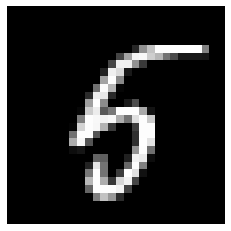

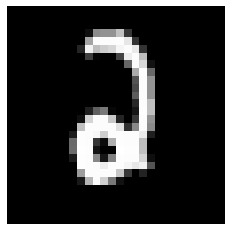

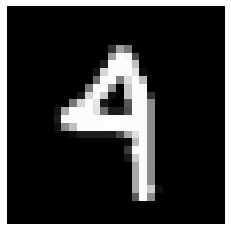

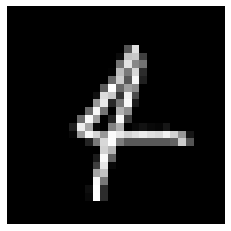

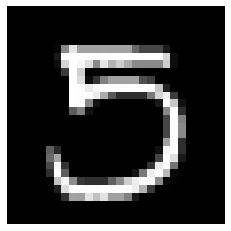

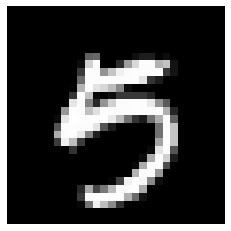

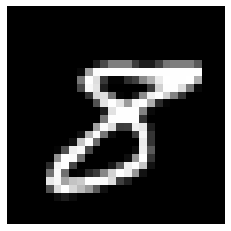

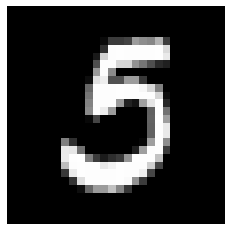

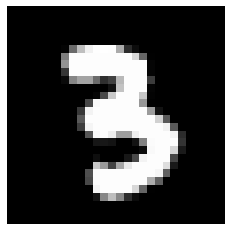

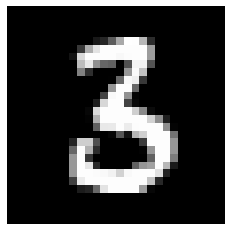

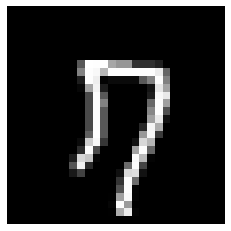

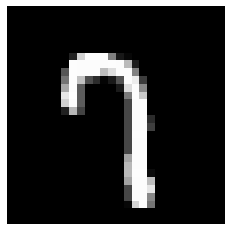

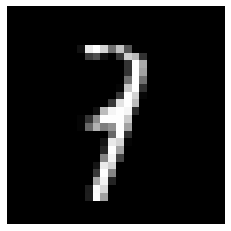

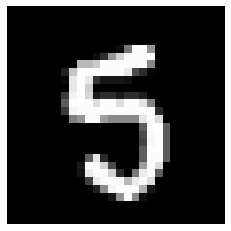

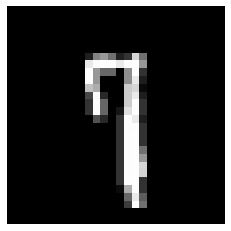

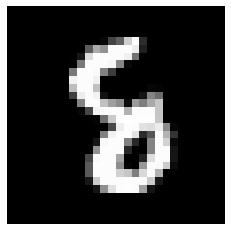

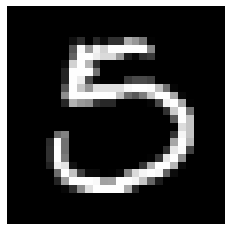

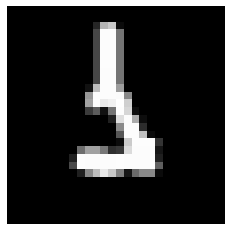

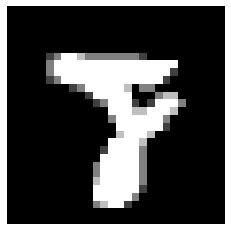

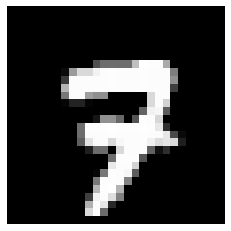

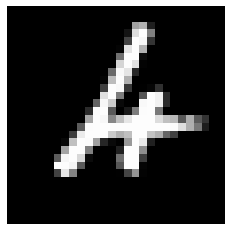

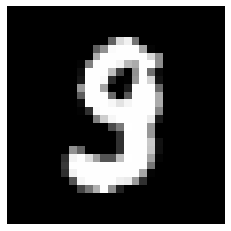

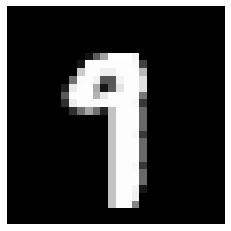

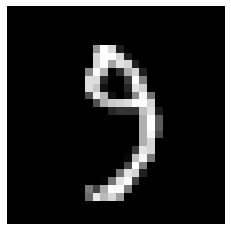

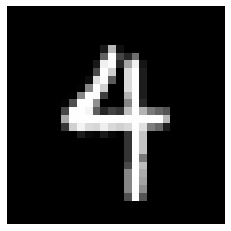

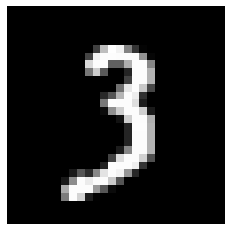

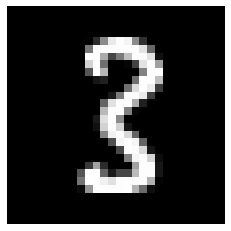

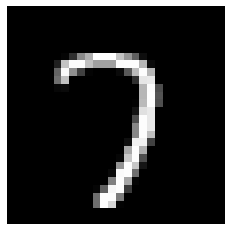

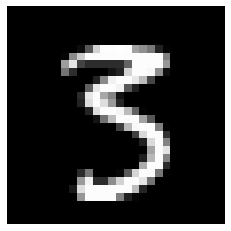

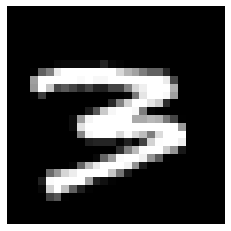

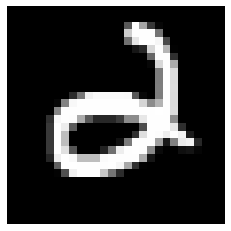

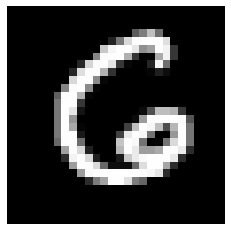

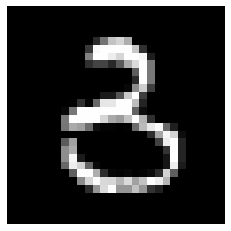

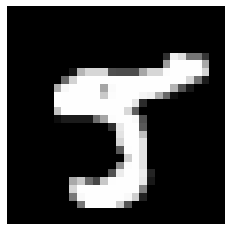

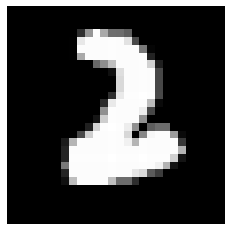

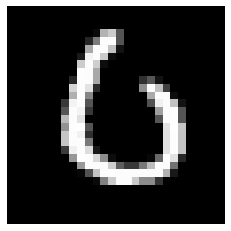

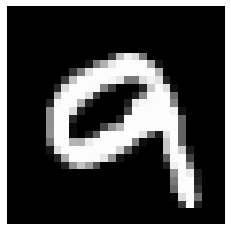

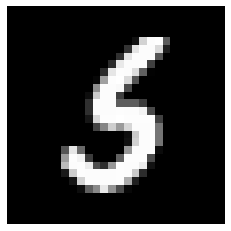

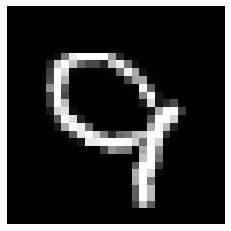

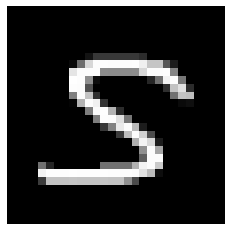

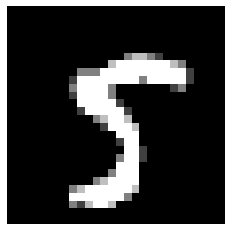

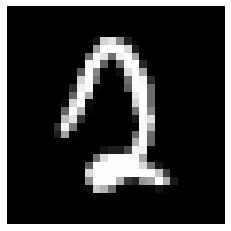

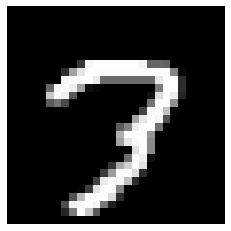

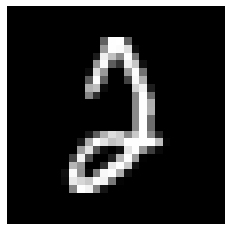

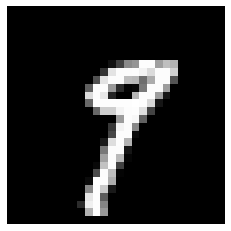

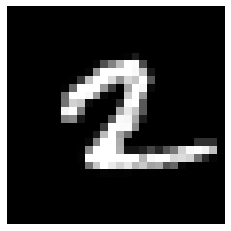

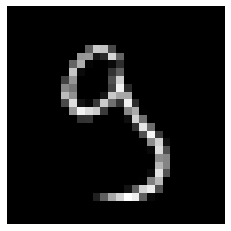

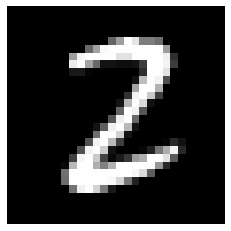

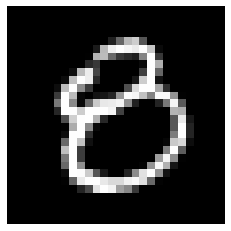

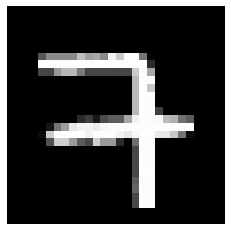

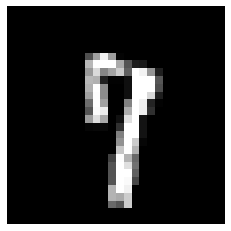

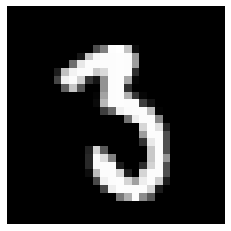

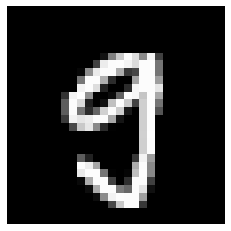

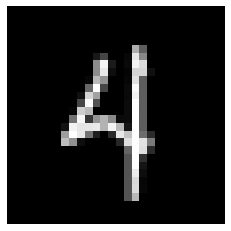

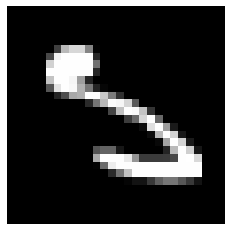

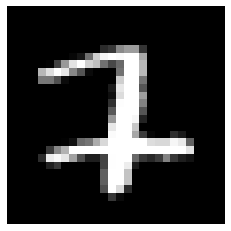

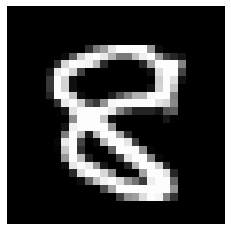

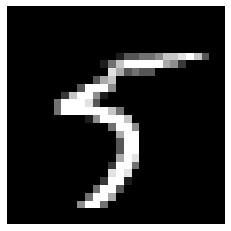

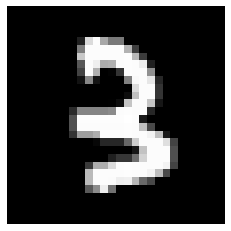

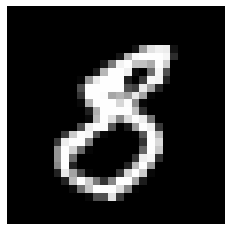

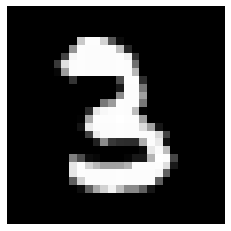

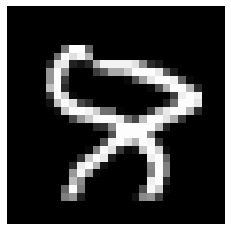

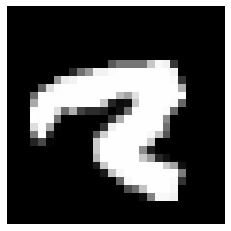

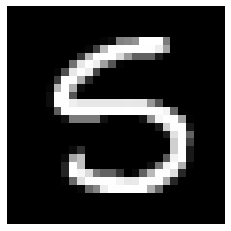

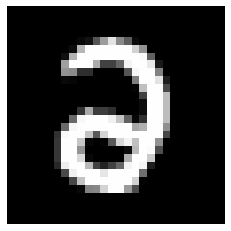

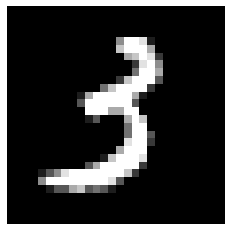

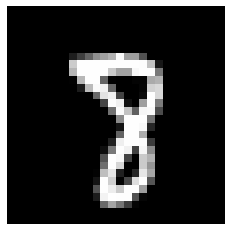

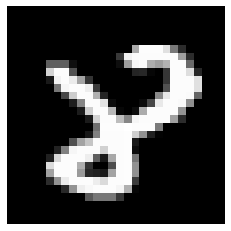

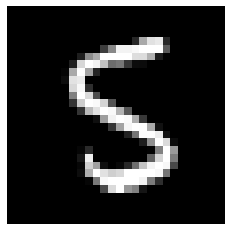

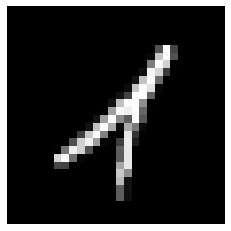

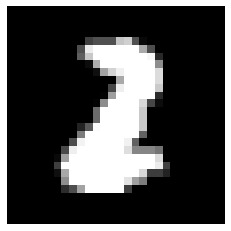

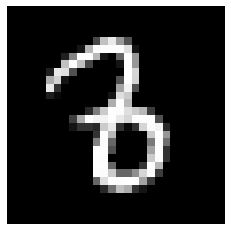

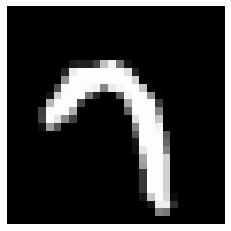

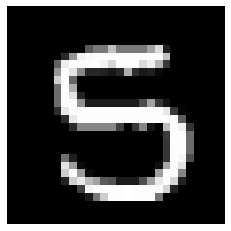

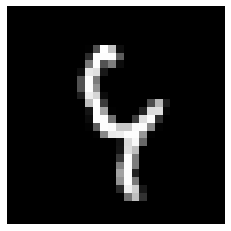

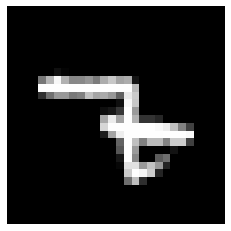

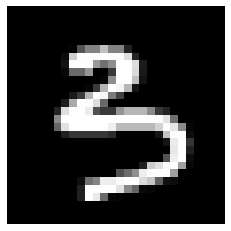

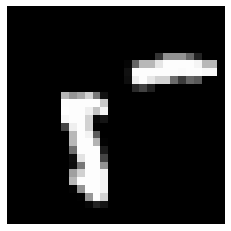

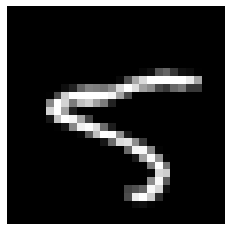

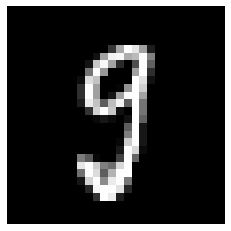

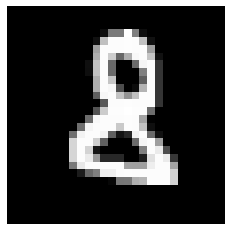

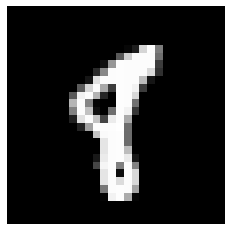

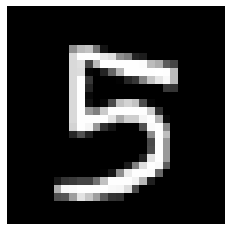

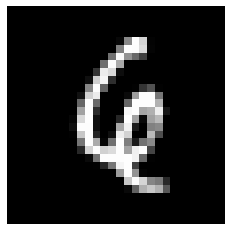

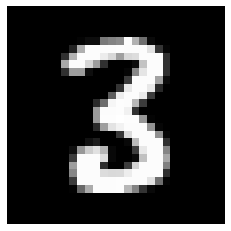

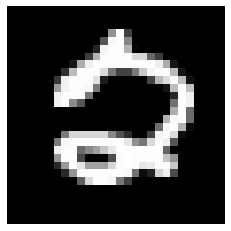

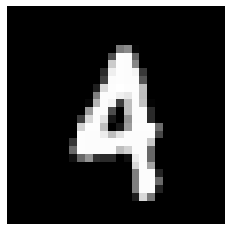

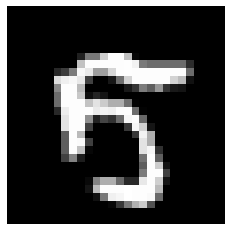

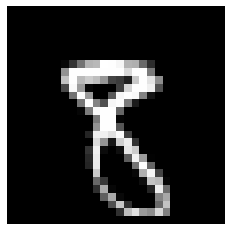

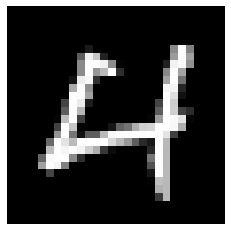

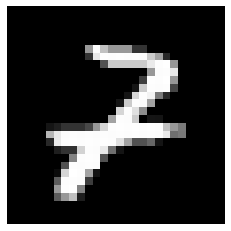

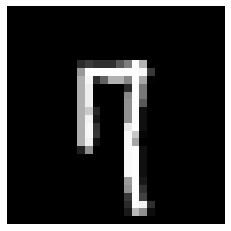

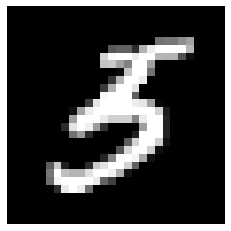

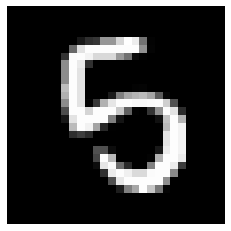

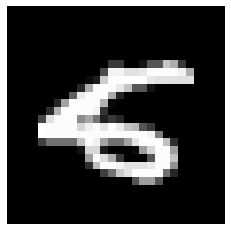

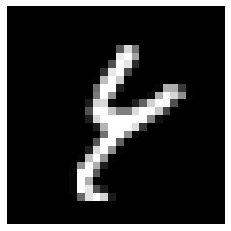

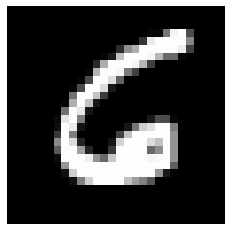

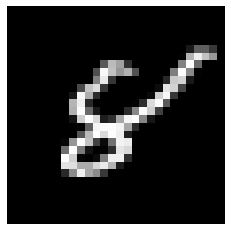

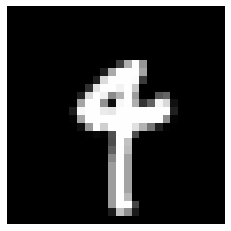

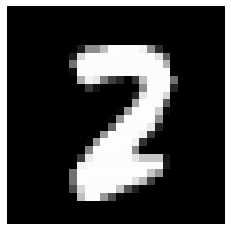

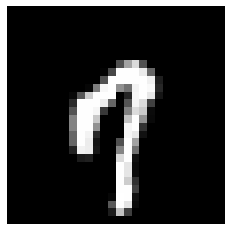

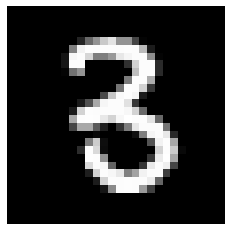

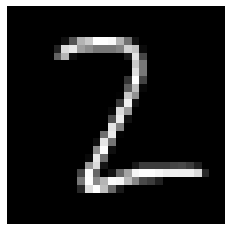

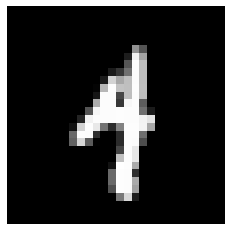

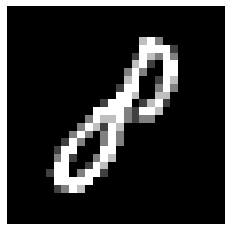

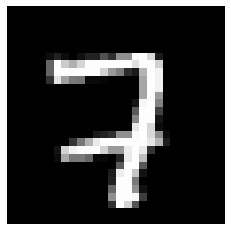

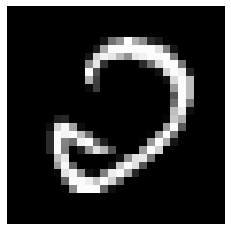

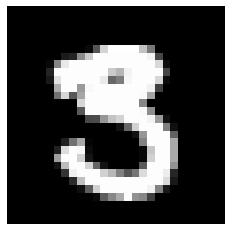

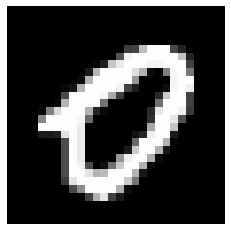

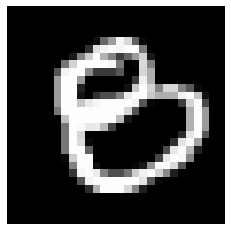

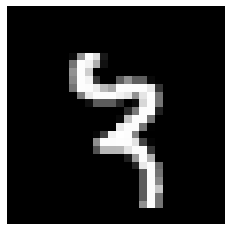

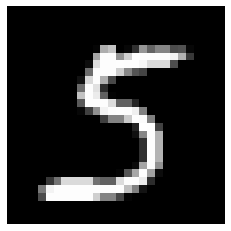

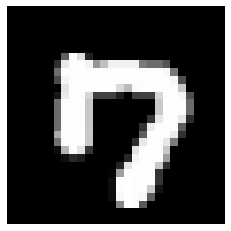

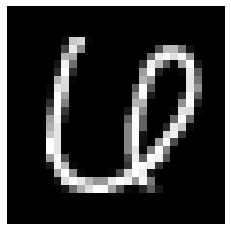

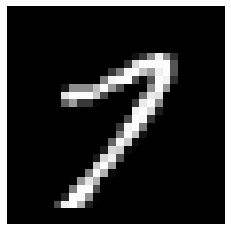

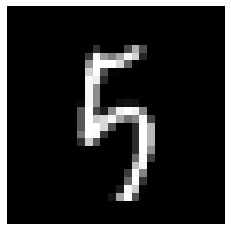

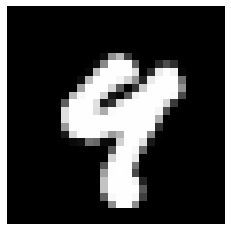

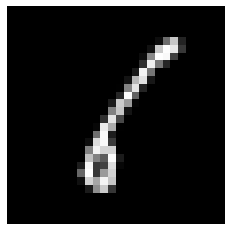

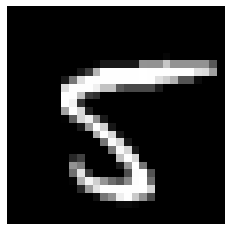

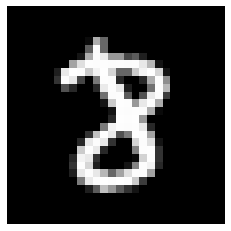

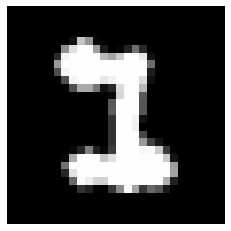

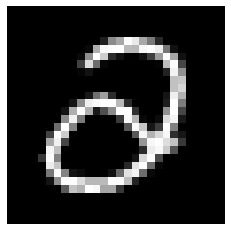

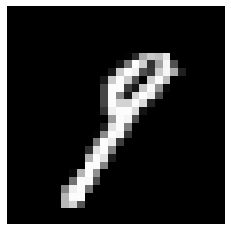

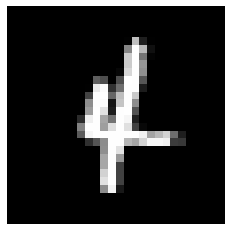

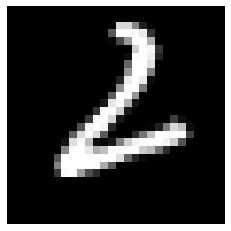

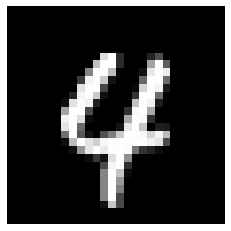

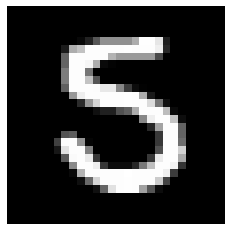

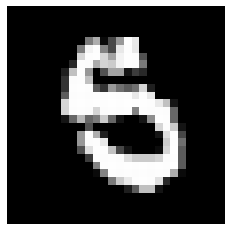

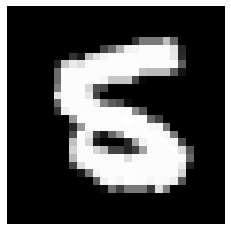

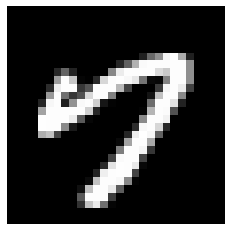

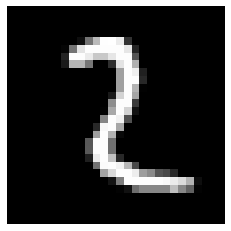

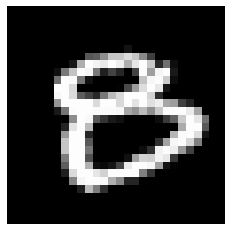

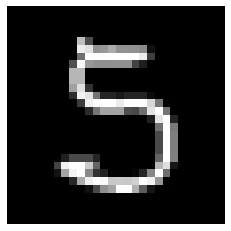

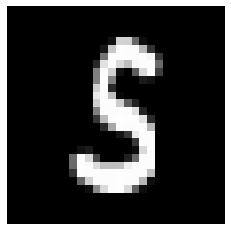

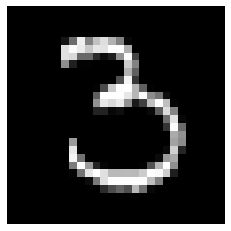

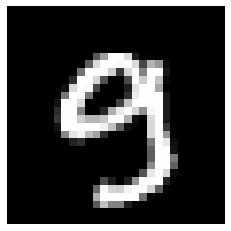

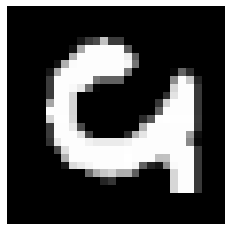

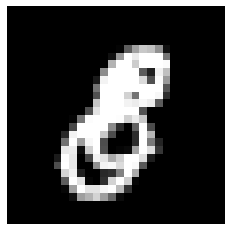

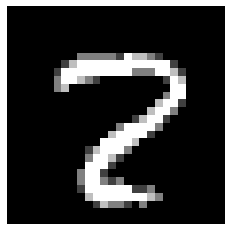

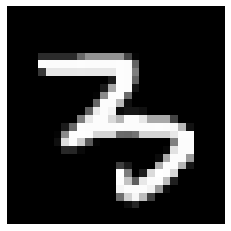

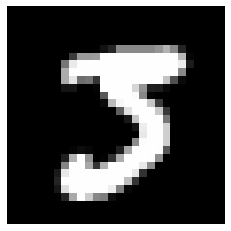

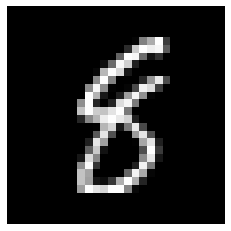

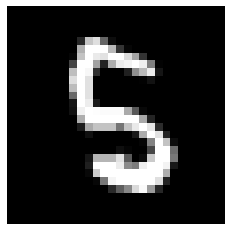

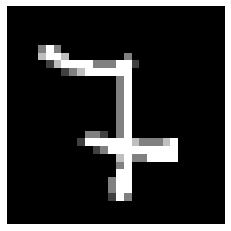

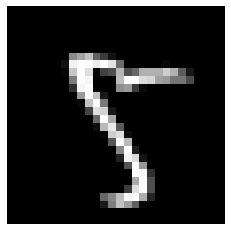

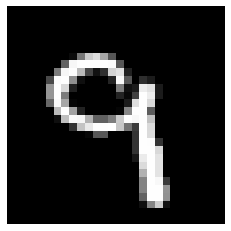

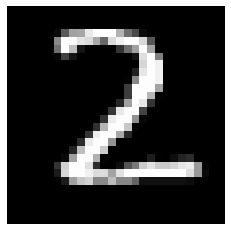

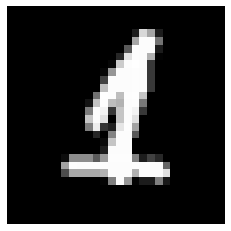

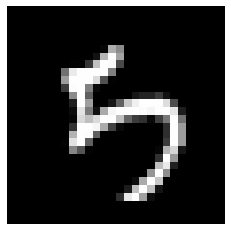

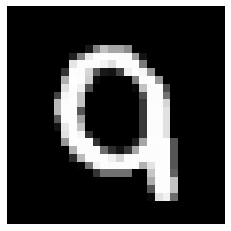

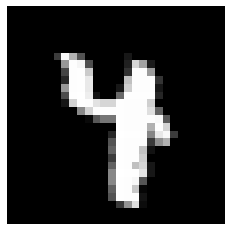

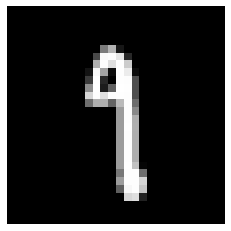

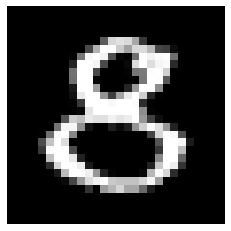

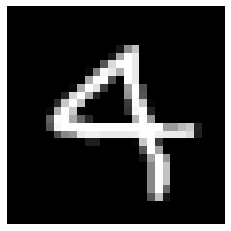

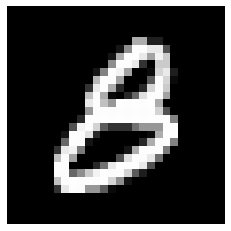

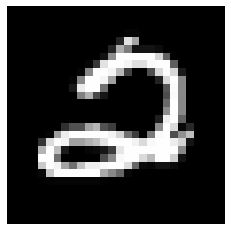

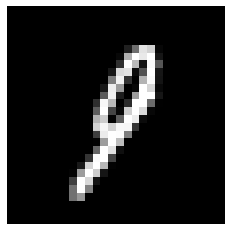

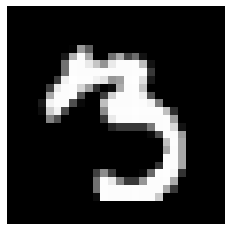

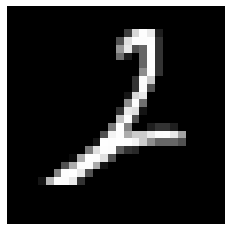

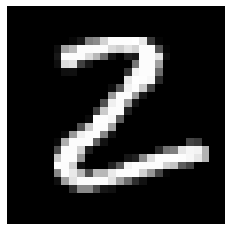

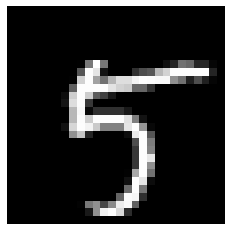

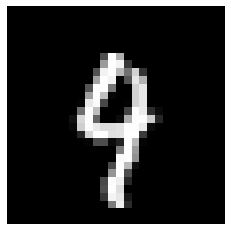

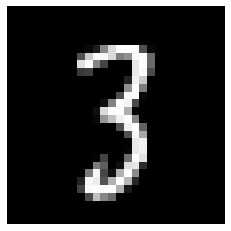

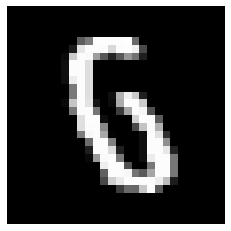

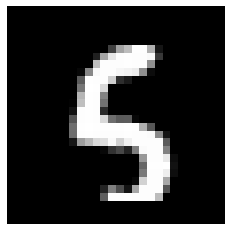

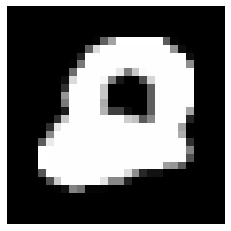

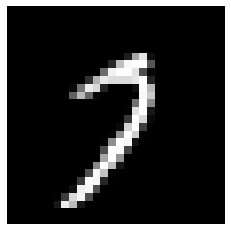

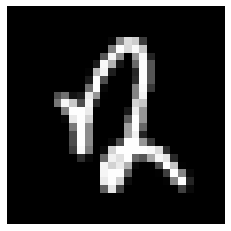

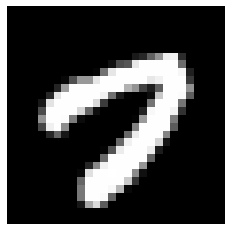

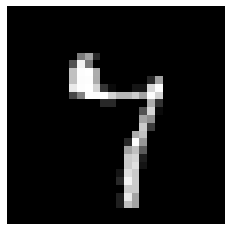

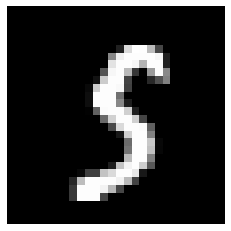

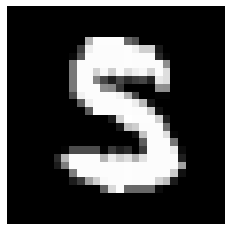

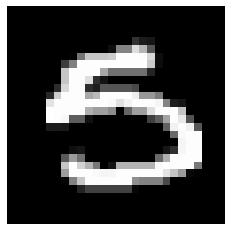

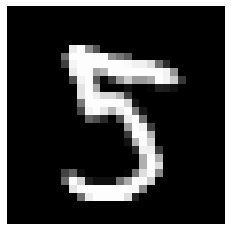

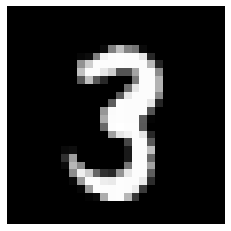

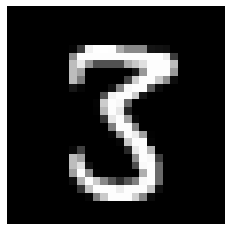

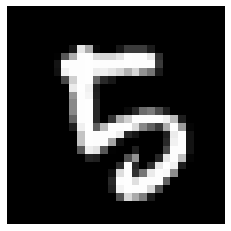

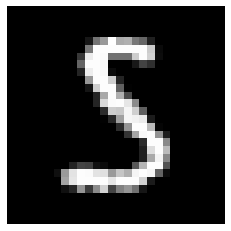

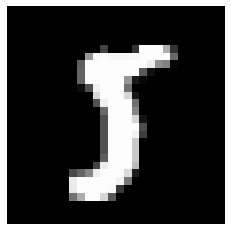

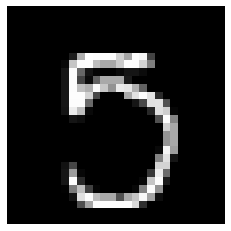

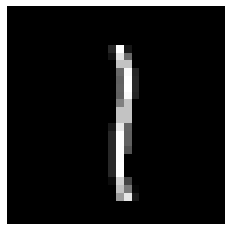

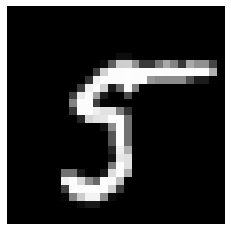

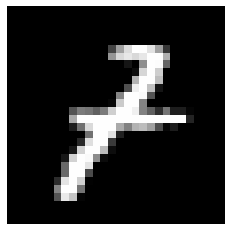

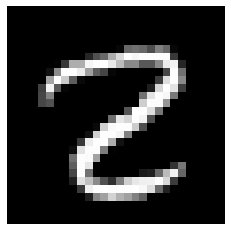

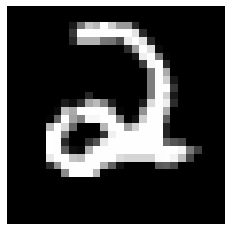

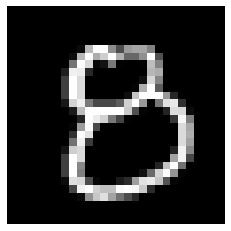

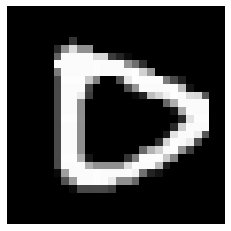

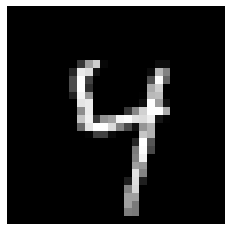

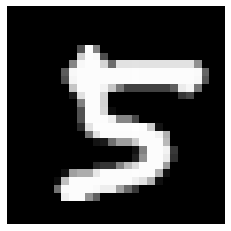

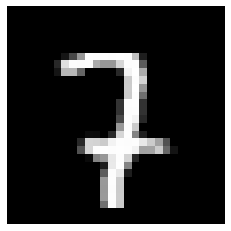

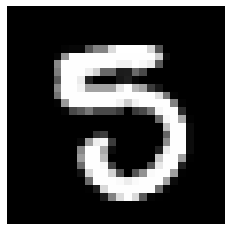

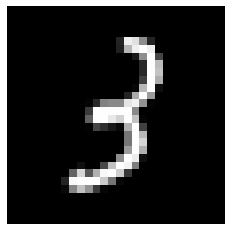

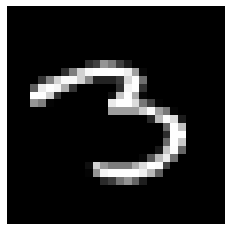

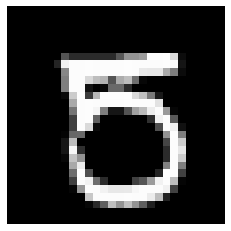

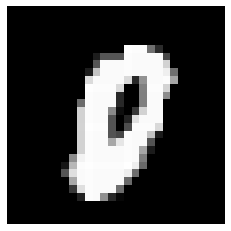

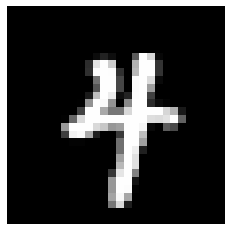

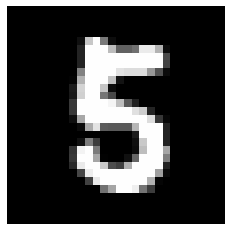

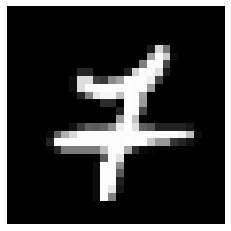

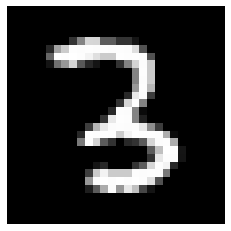

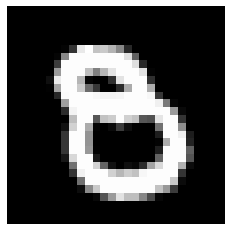

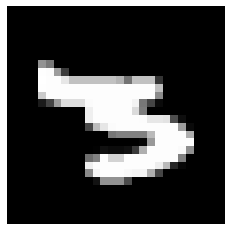

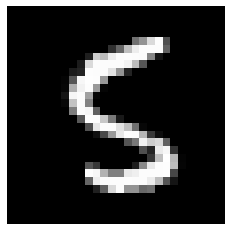

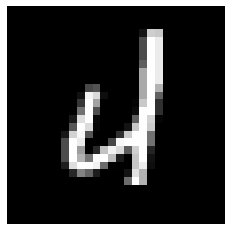

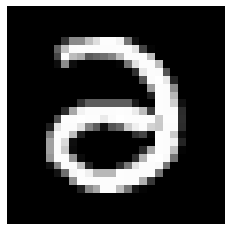

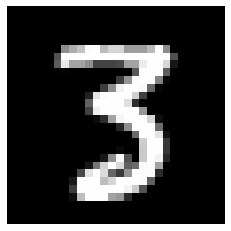

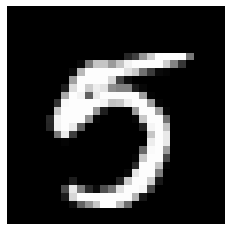

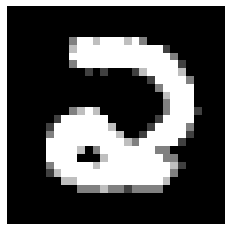

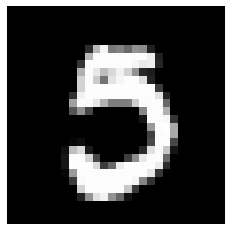

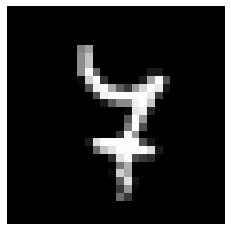

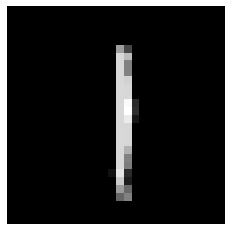

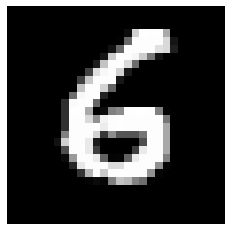

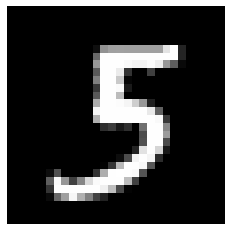

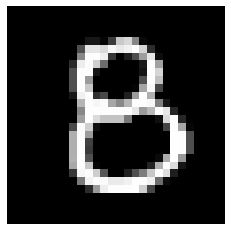

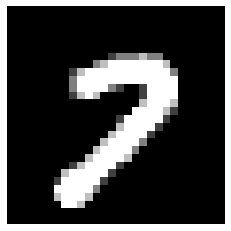

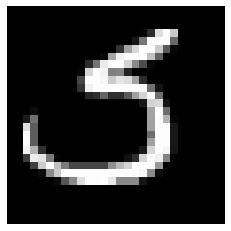

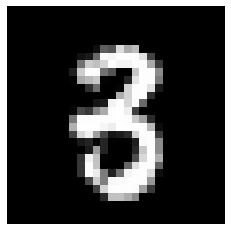

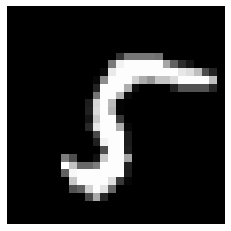

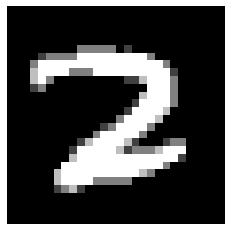

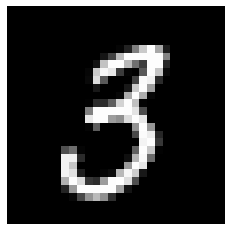

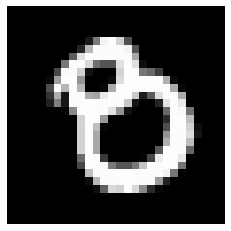

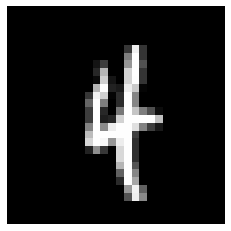

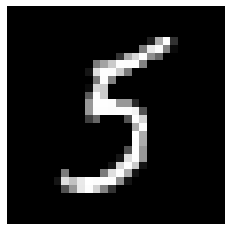

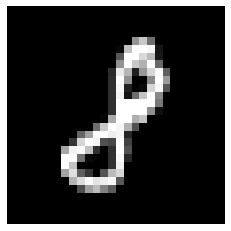

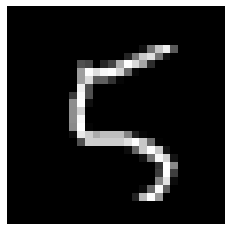

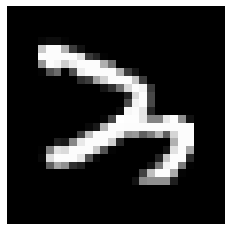

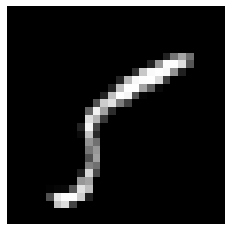

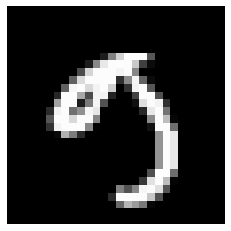

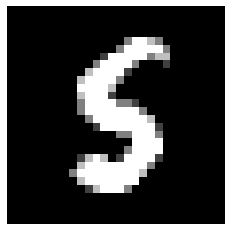

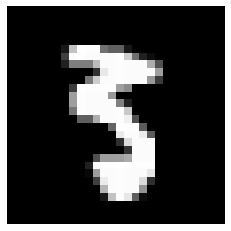

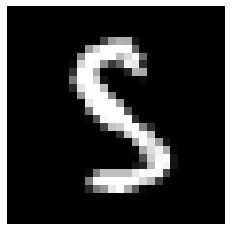

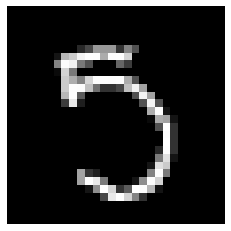

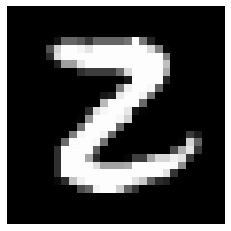

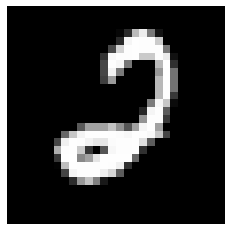

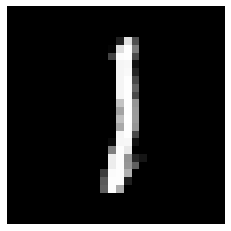

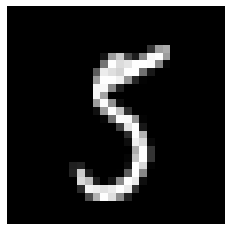

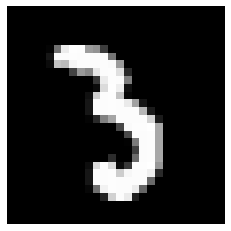

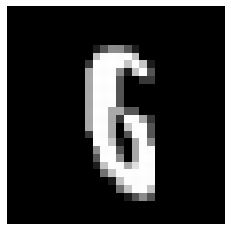

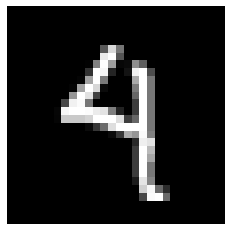

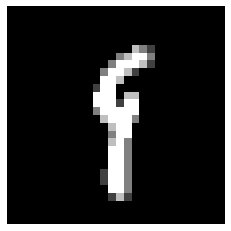

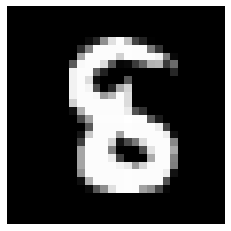

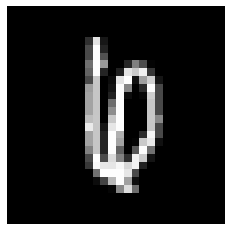

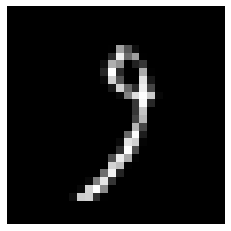

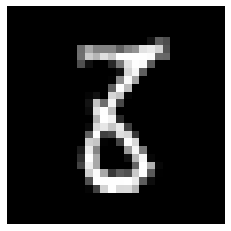

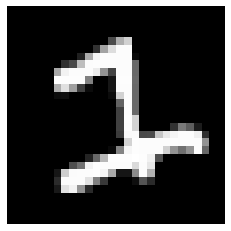

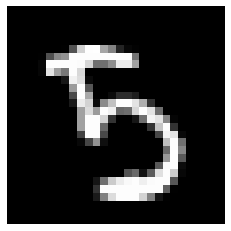

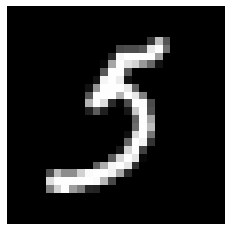

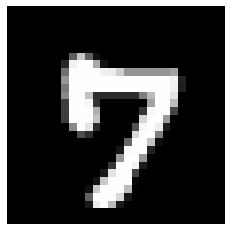

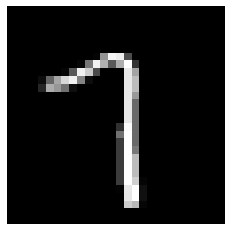

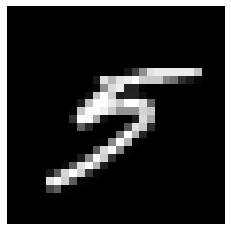

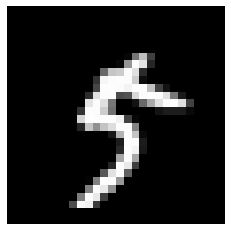

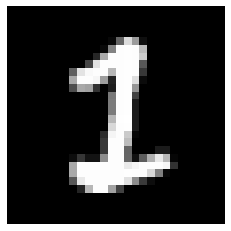

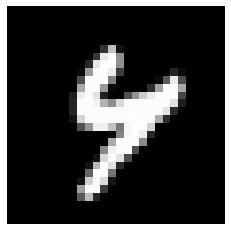

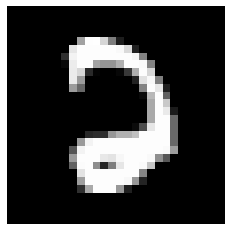

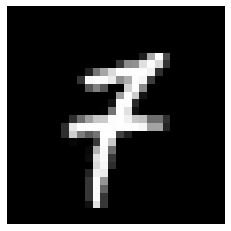

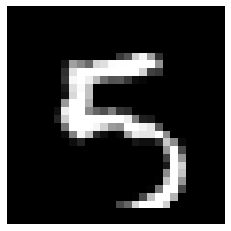

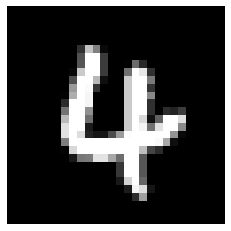

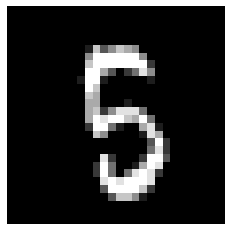

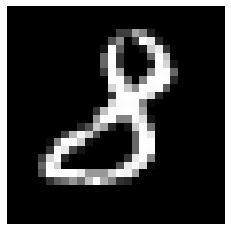

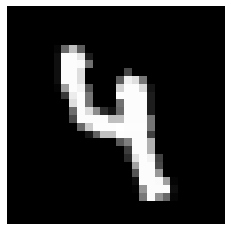

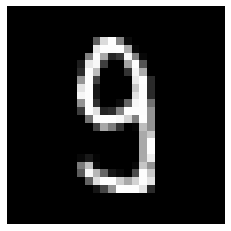

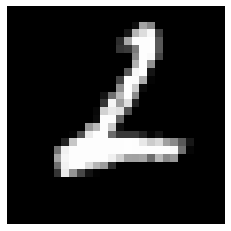

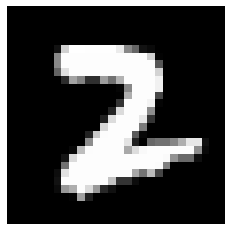

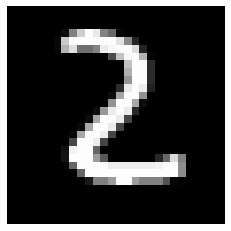

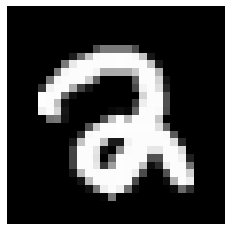

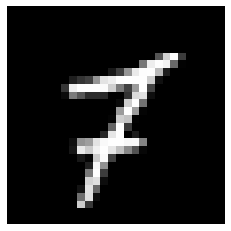

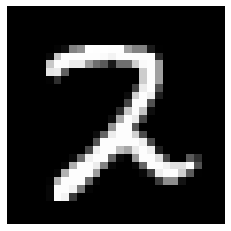

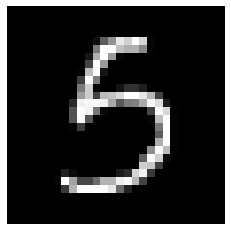

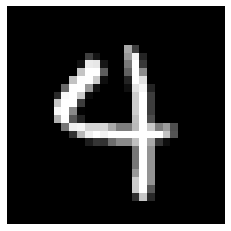

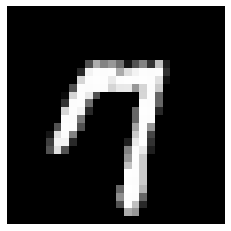

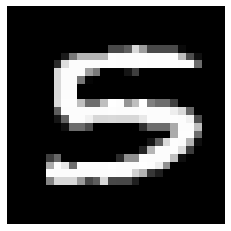

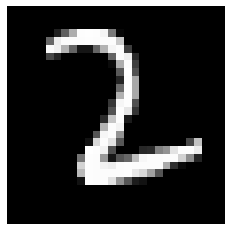

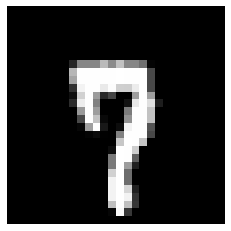

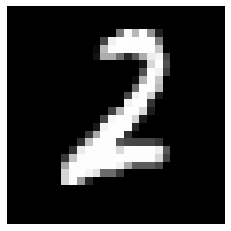

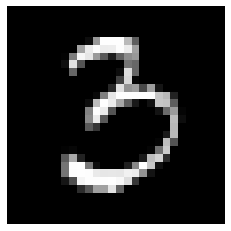

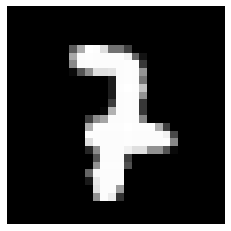

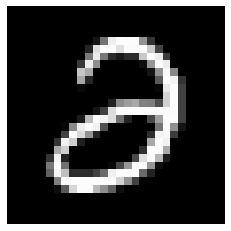

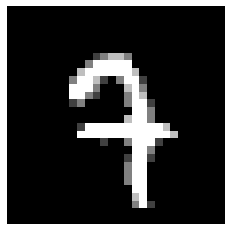

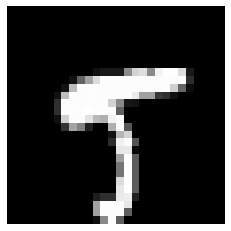

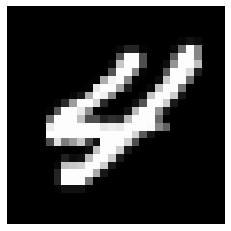

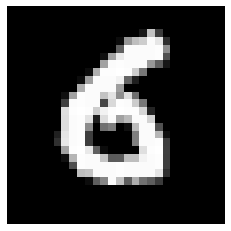

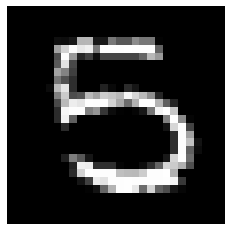

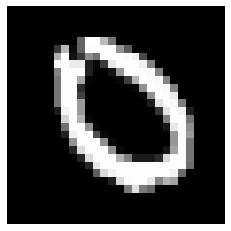

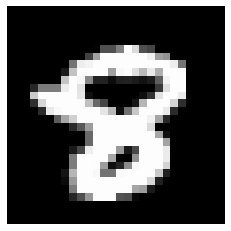

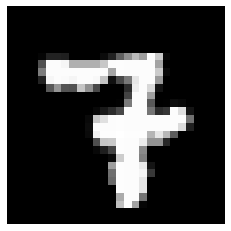

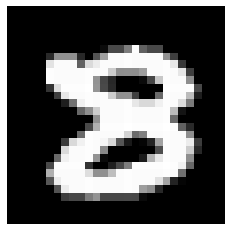

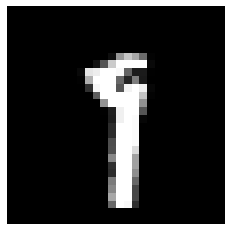

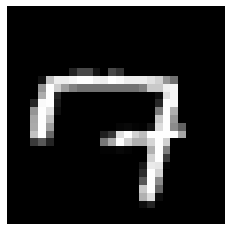

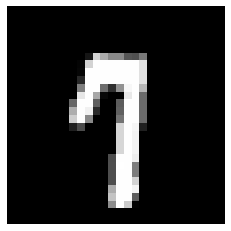

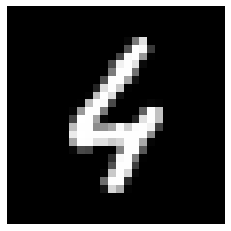

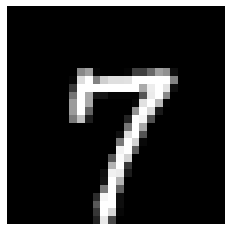

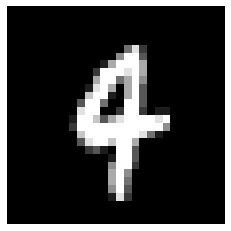

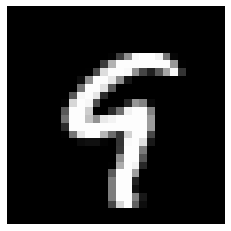

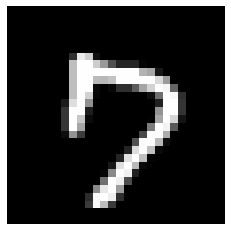

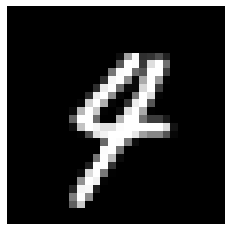

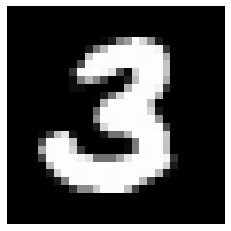

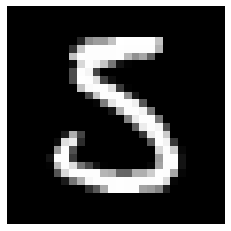

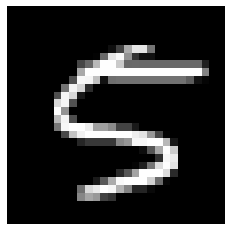

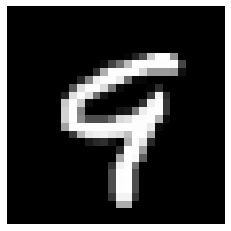

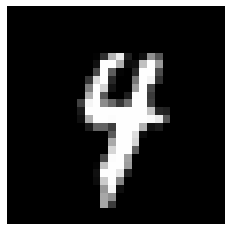

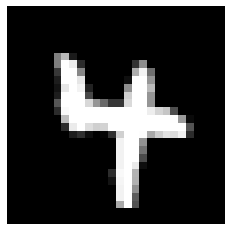

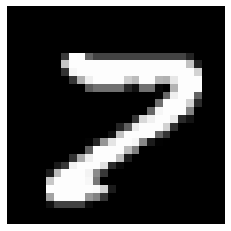

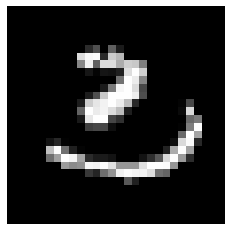

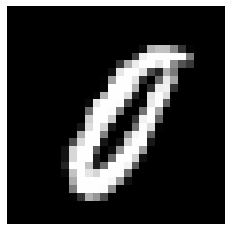

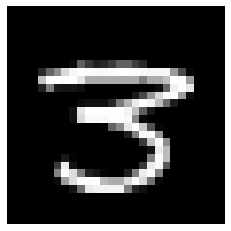

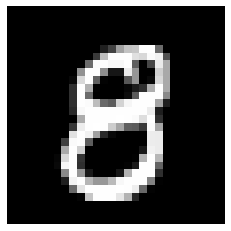

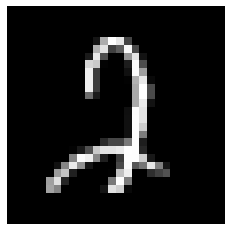

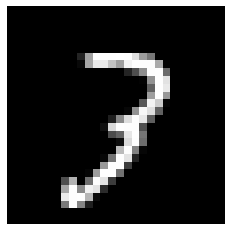

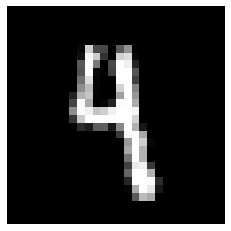

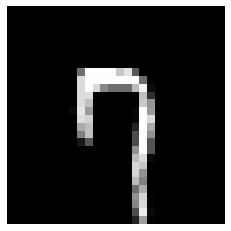

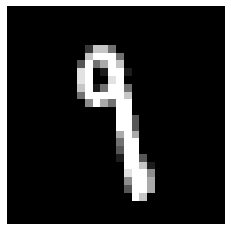

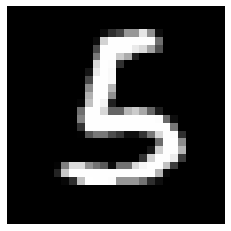

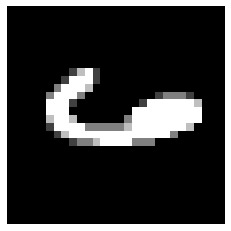

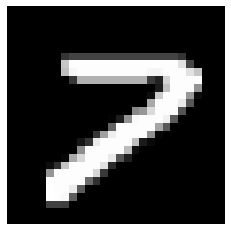

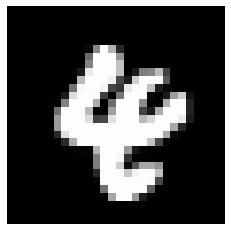

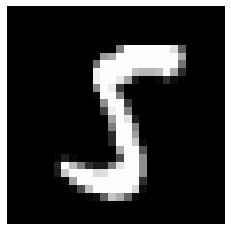

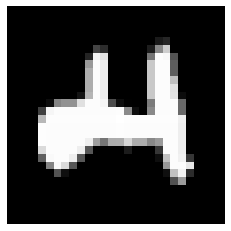

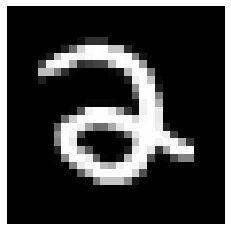

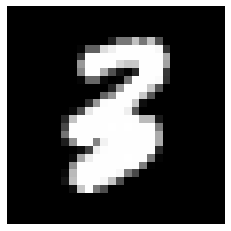

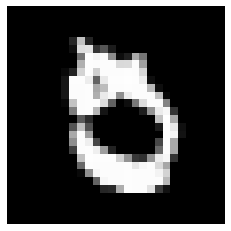

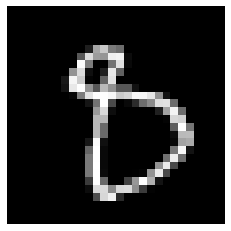

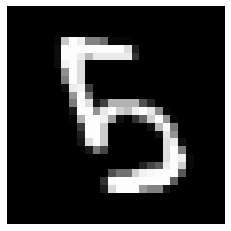

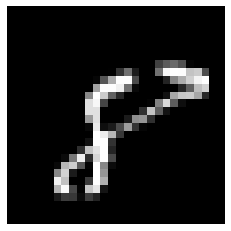

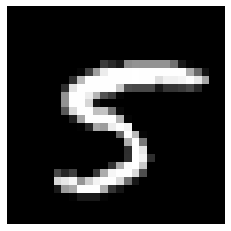

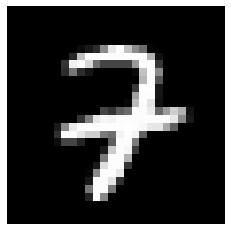

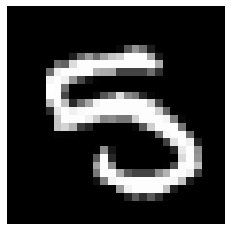

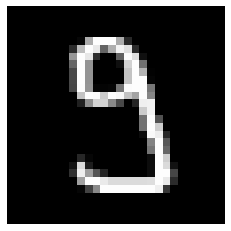

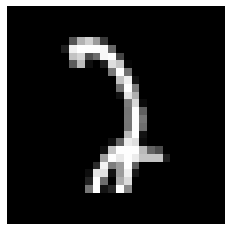

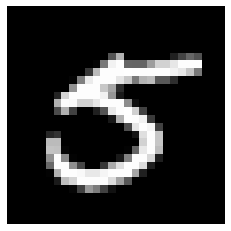

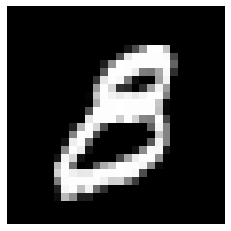

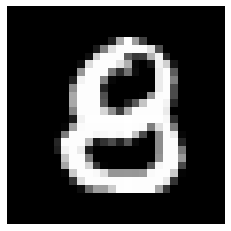

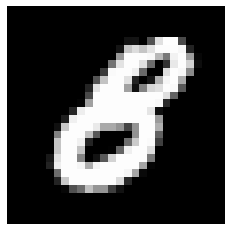

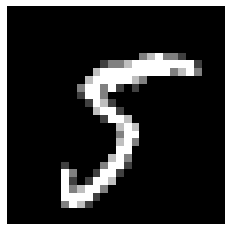

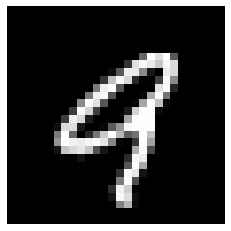

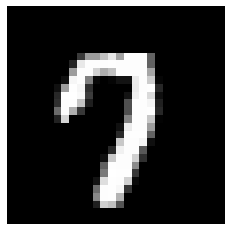

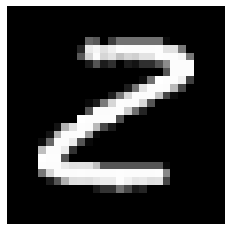

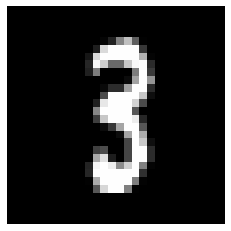

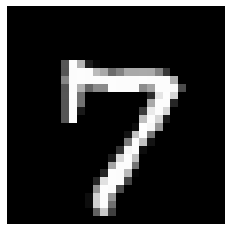

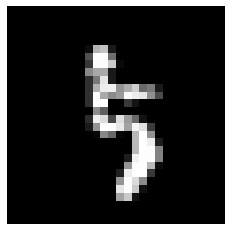

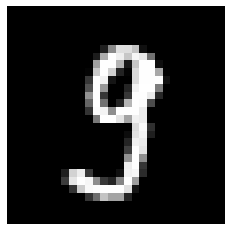

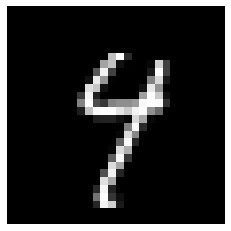

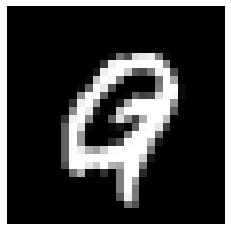

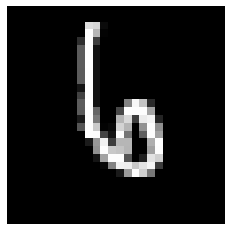

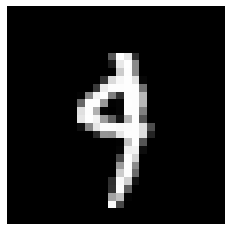

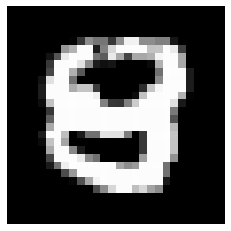

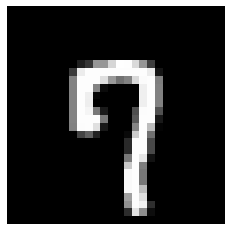

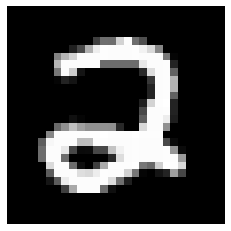

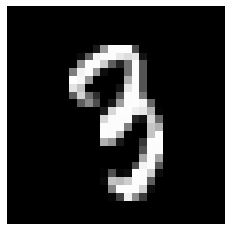

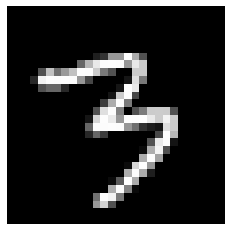

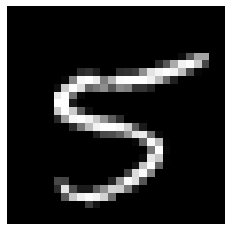

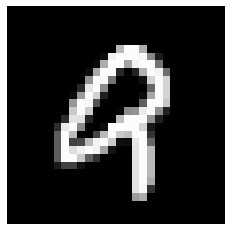

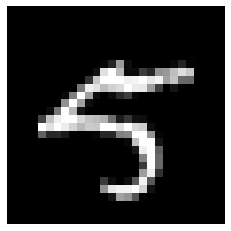

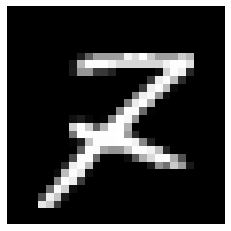

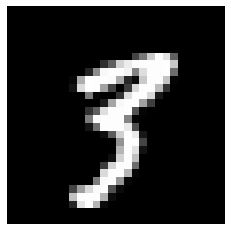

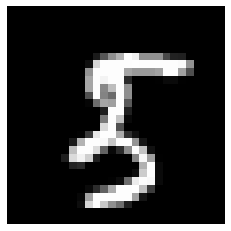

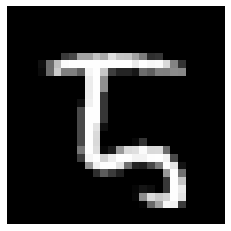

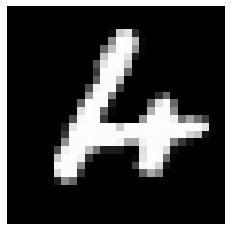

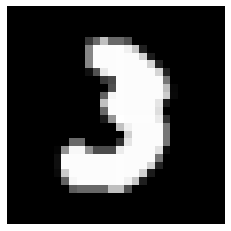

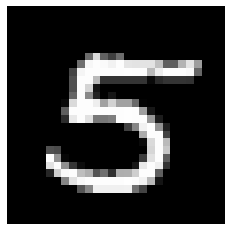

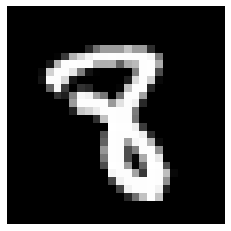

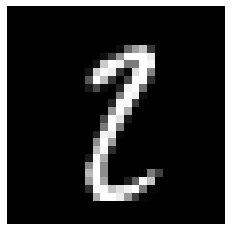

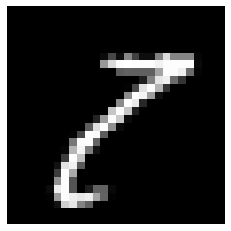

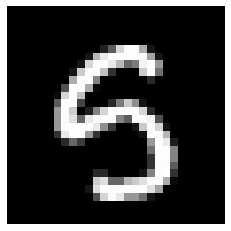

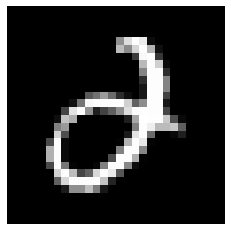

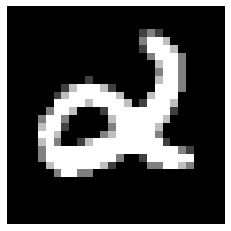

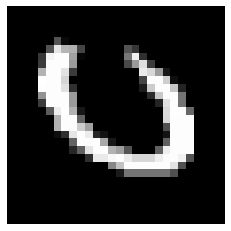

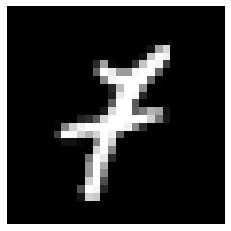

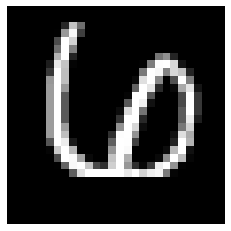

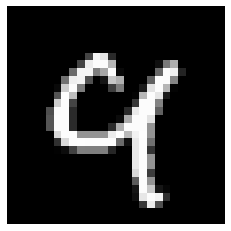

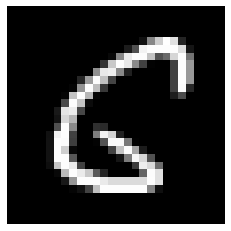

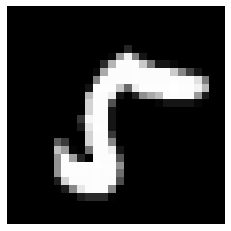

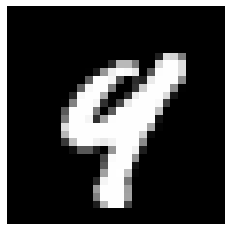

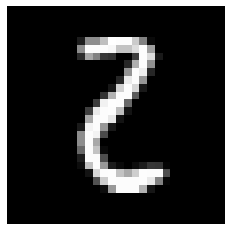

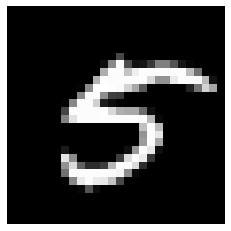

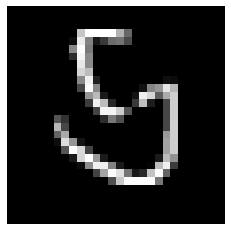

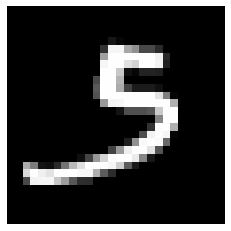

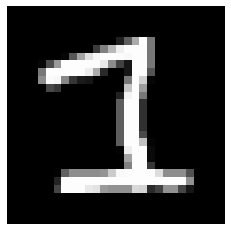

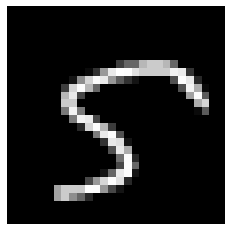

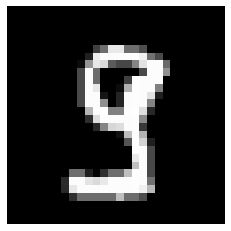

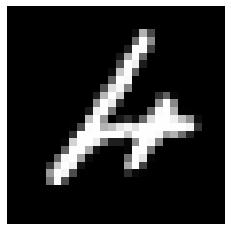

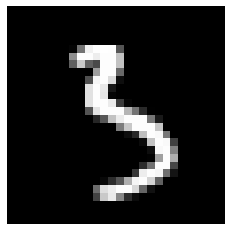

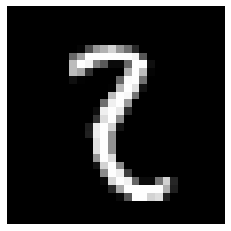

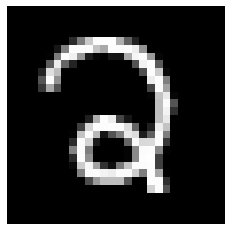

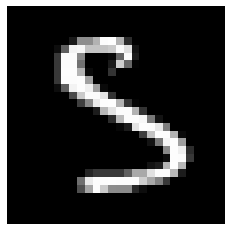

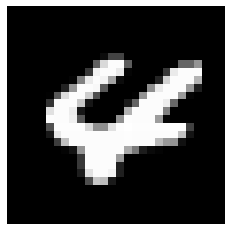

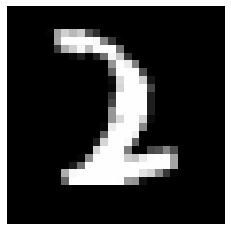

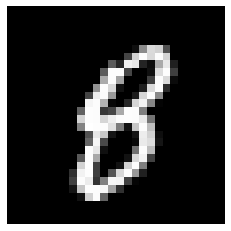

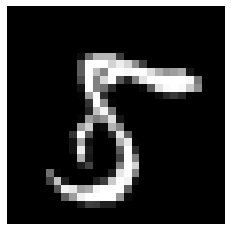

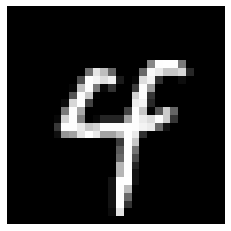

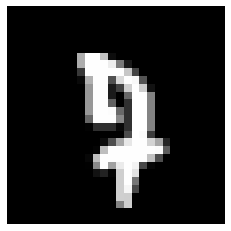

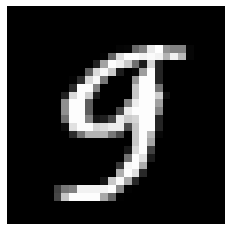

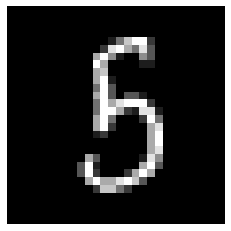

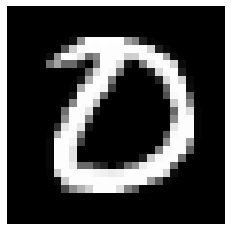

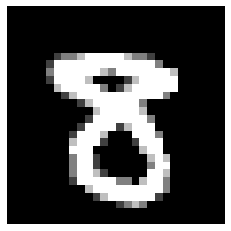

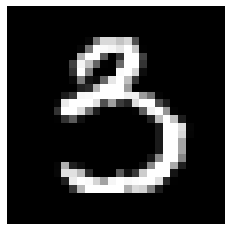

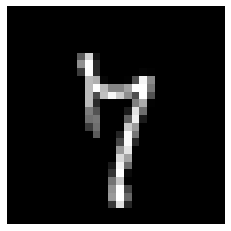

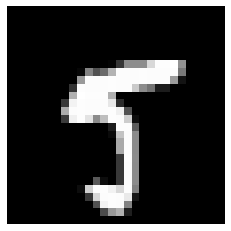

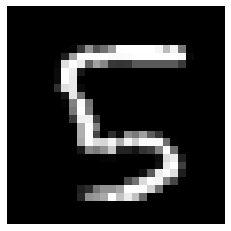

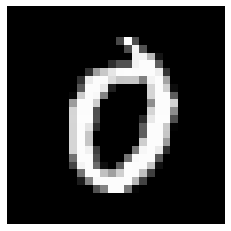

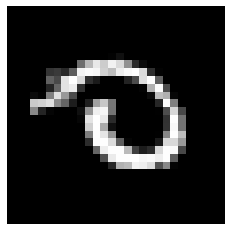

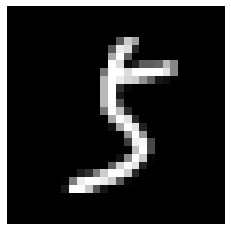

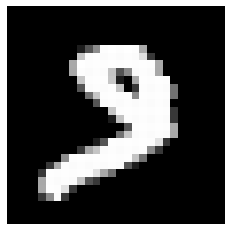

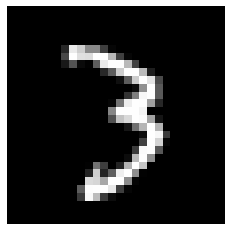

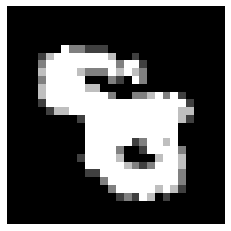

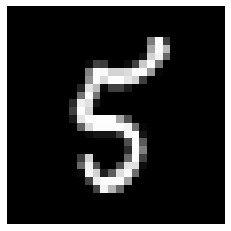

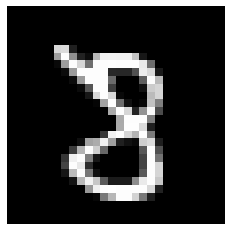

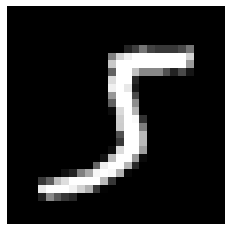

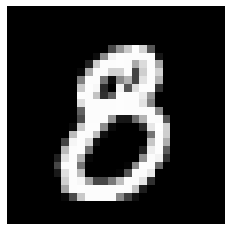

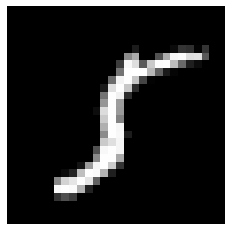

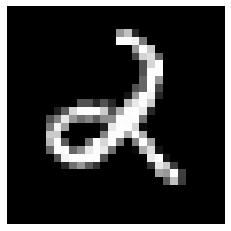

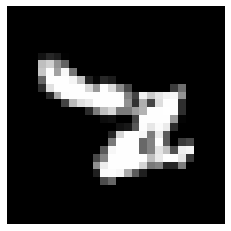

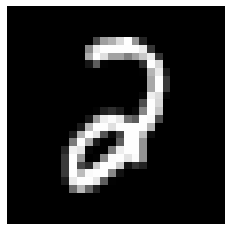

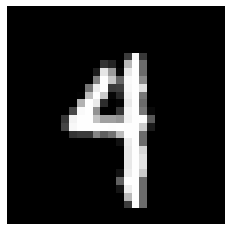

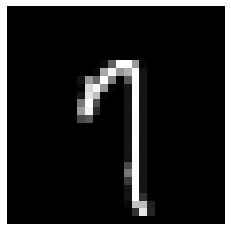

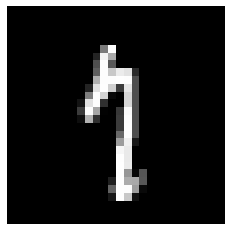

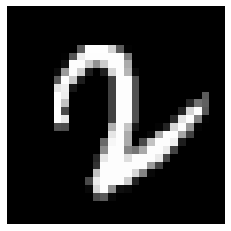

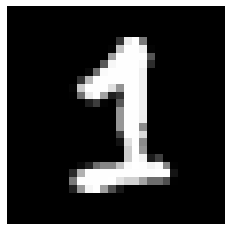

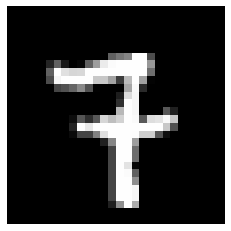

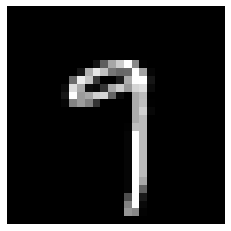

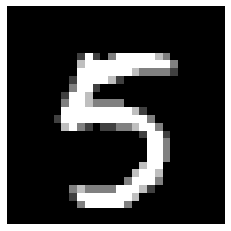

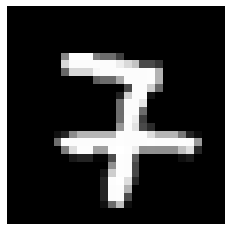

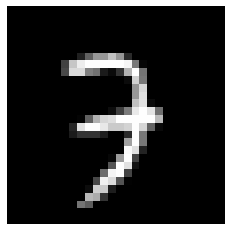

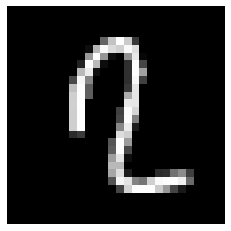

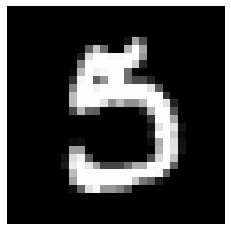

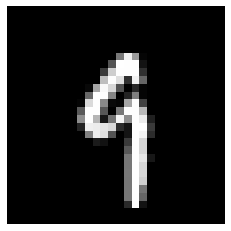

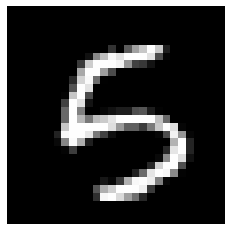

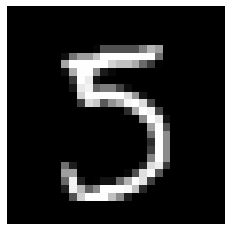

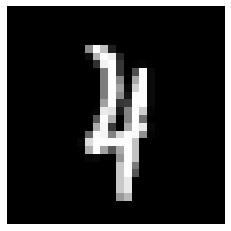

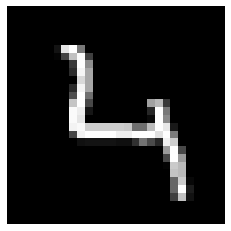

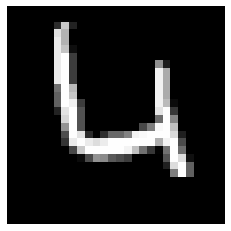

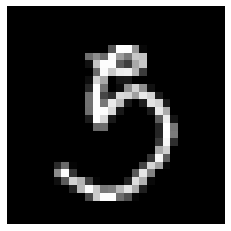

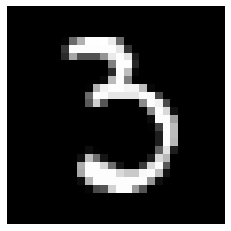

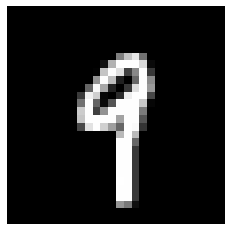

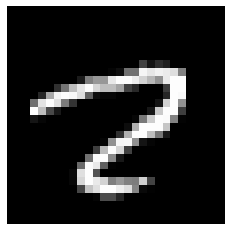

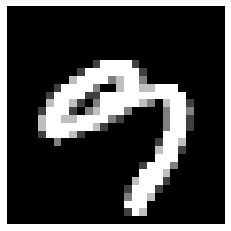

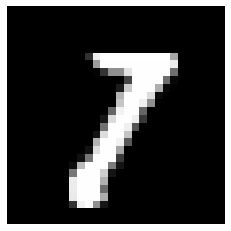

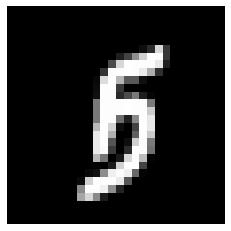

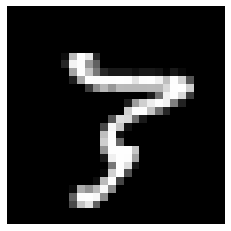

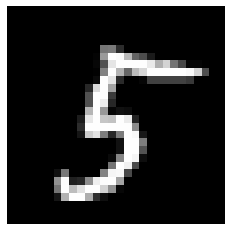

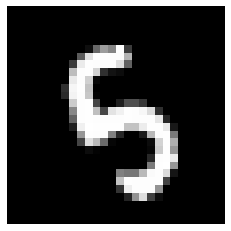

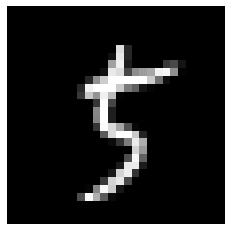

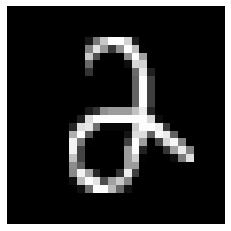

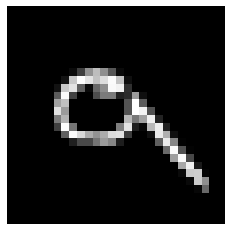

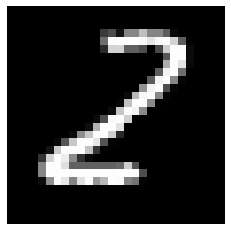

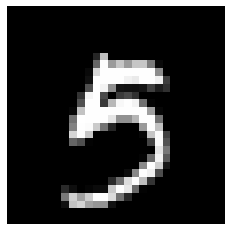

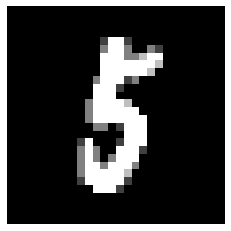

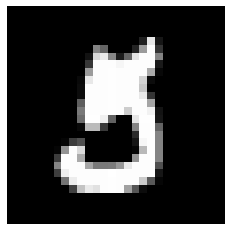

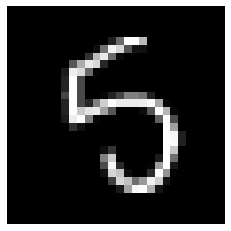

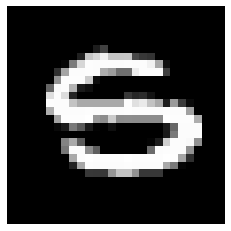

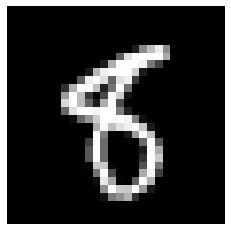

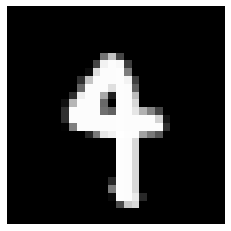

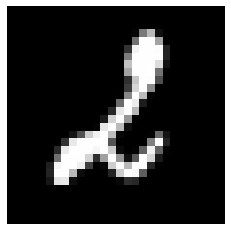

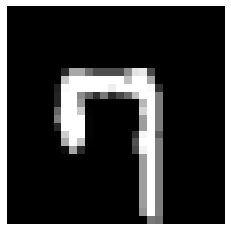

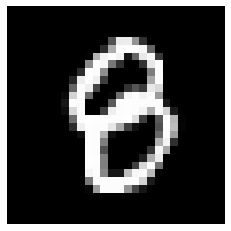

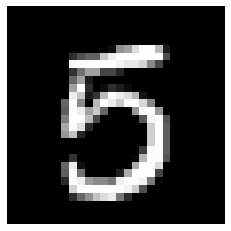

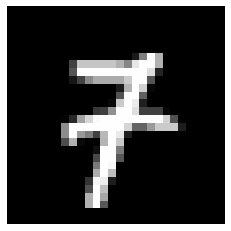

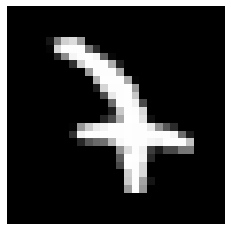

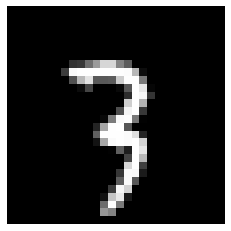

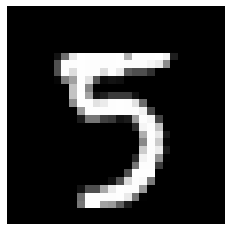

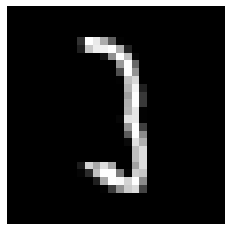

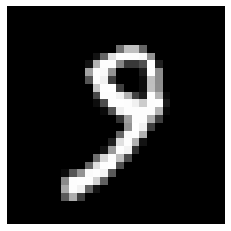

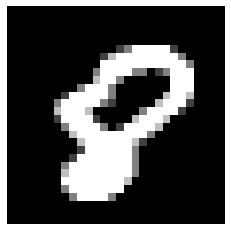

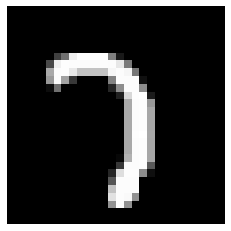

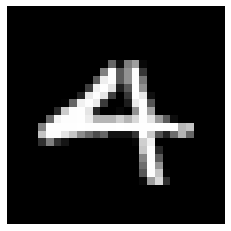

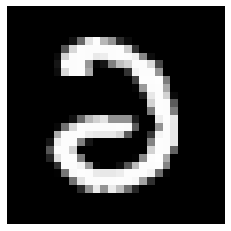

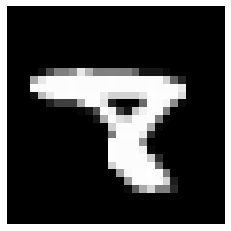

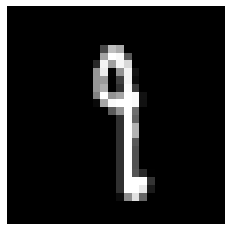

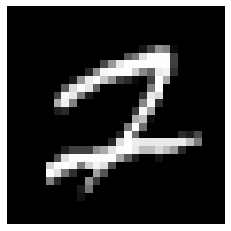

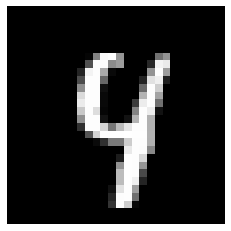

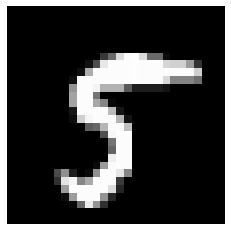

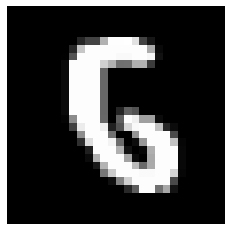

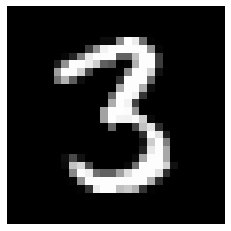

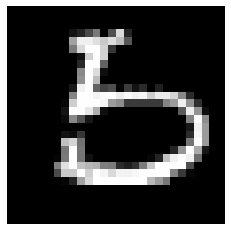

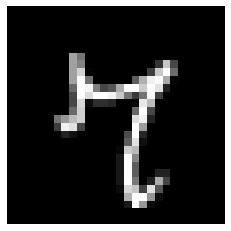

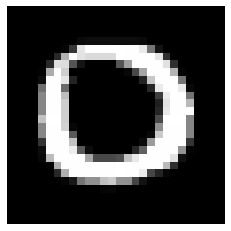

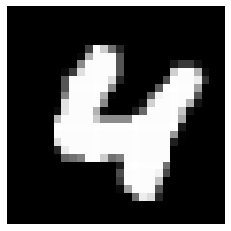

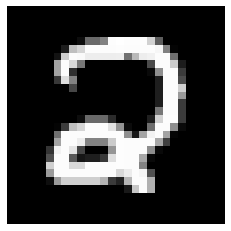

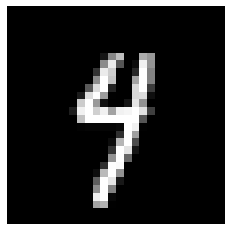

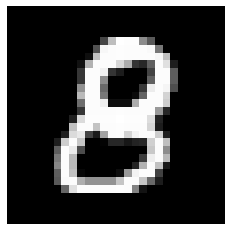

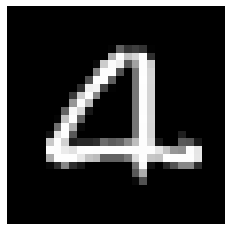

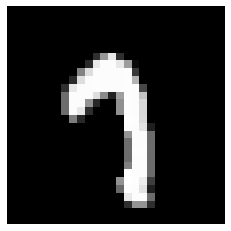

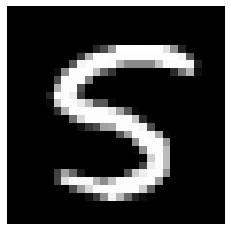

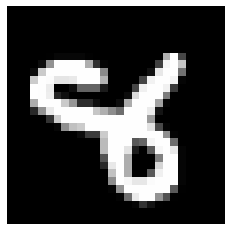

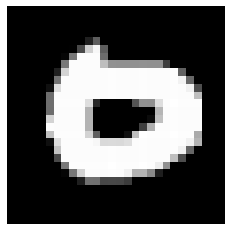

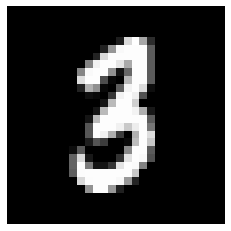

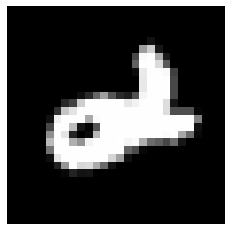

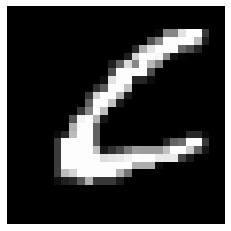

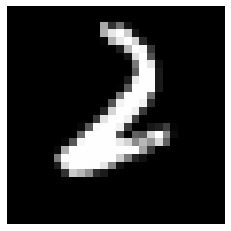

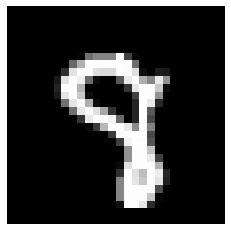

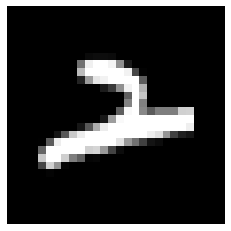

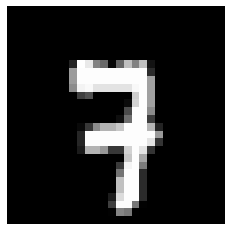

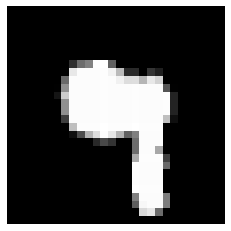

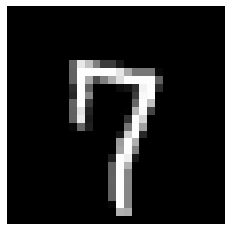

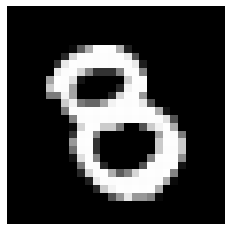

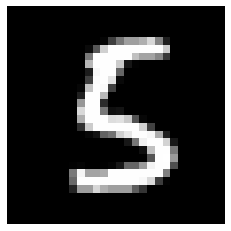

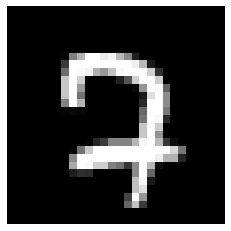

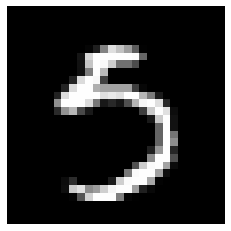

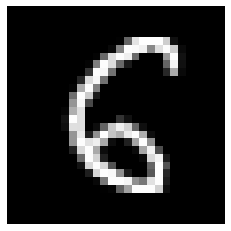

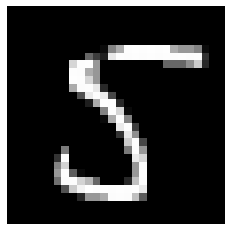

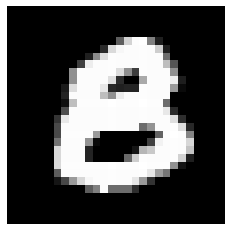

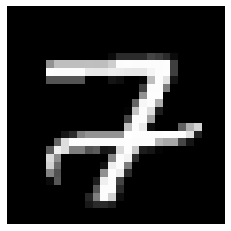

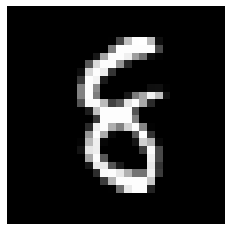

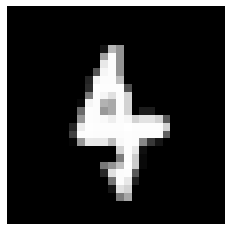

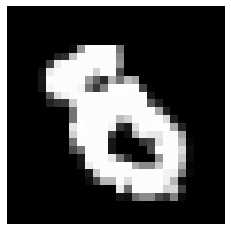

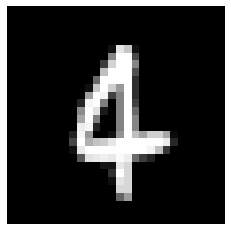

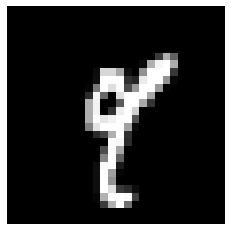

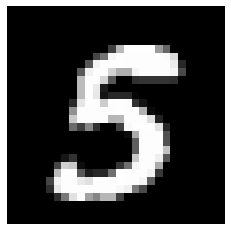

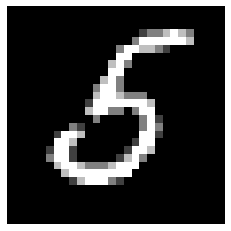

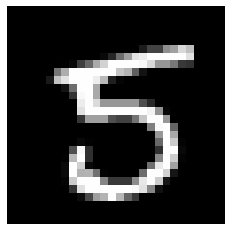

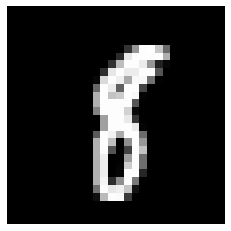

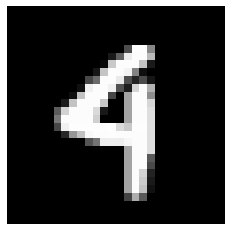

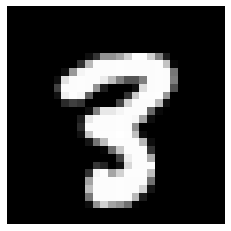

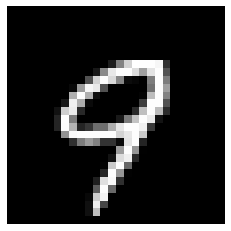

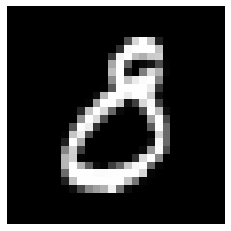

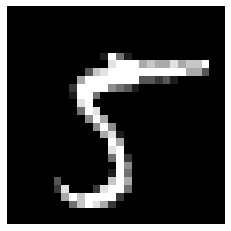

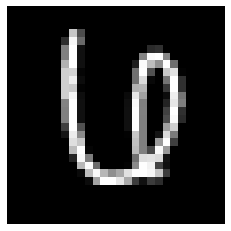

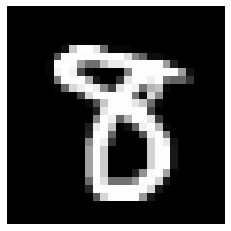

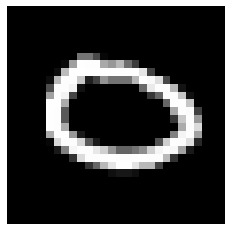

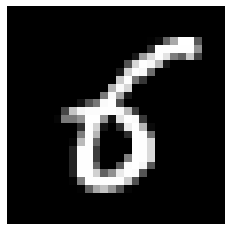

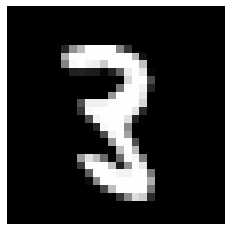

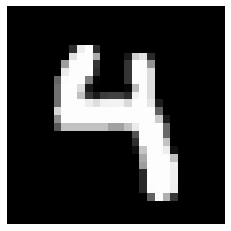

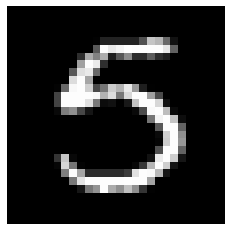

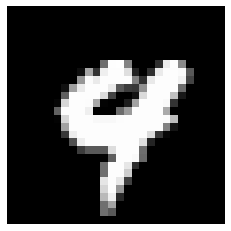

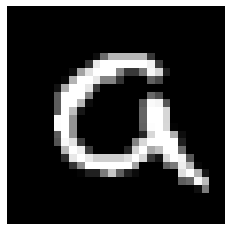

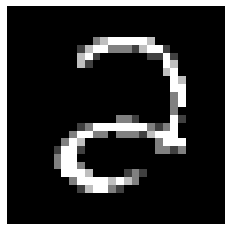

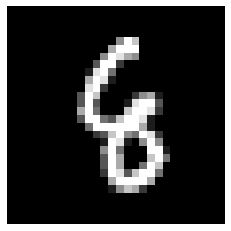

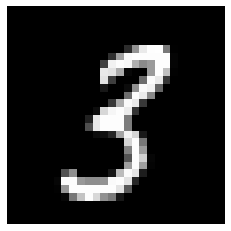

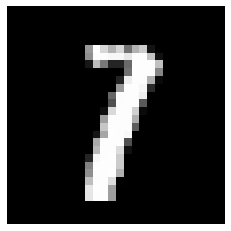

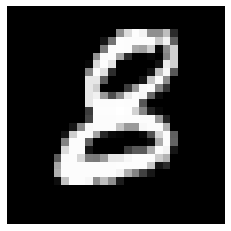

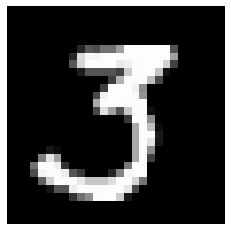

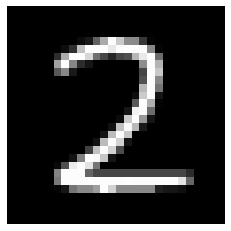

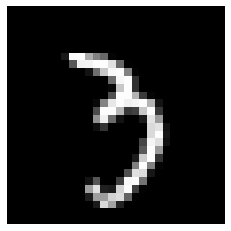

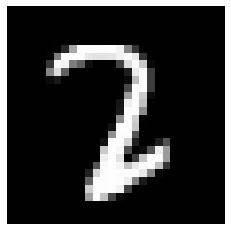

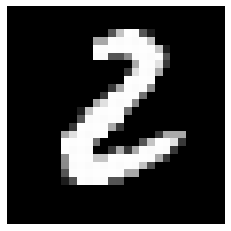

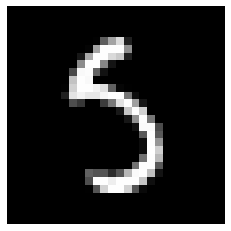

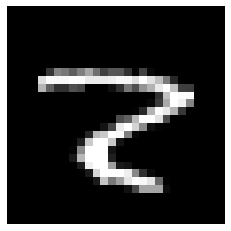

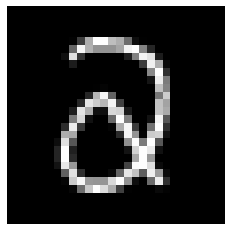

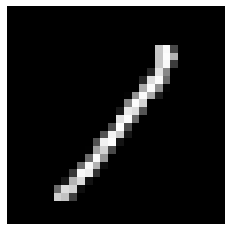

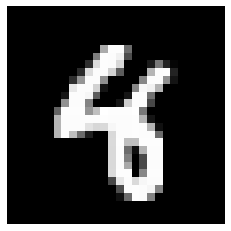

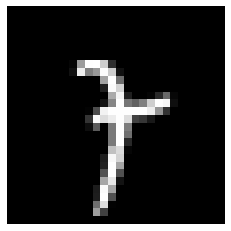

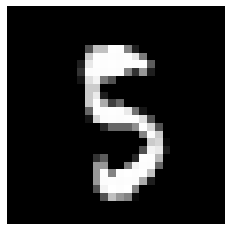

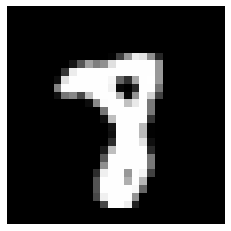

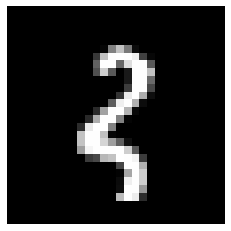

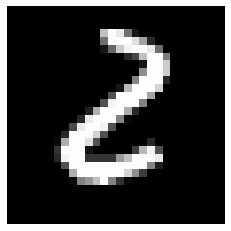

In [ ]:
print(y_testing.shape)
def image_show(index):
  plt.imshow(x_testing[index],cmap='gray') #cmap print the image black and white only
  plt.axis('off')
  plt.show()
print("best accauracy = " + str (acc))
print("wrong pridection photo = " + str(len(error)))
for i in error:
  image_show(i)


(28, 28)


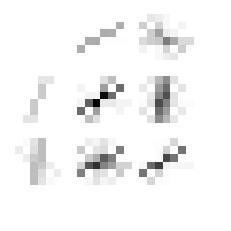

In [ ]:
# split using HOG
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
import matplotlib.pyplot as plt

print (x_train[0].shape)
def cal_features(x_train):
  hog_features=[]
  for i in range (len(x_train)):
    fd, hog_image = hog(x_train[i], orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True)
    hog_features.append(hog_image)
  return np.array(hog_features)
  
fd = cal_features(x_train);
def image_show(index):
  plt.imshow(fd[index],cmap='binary') #cmap print the image black and white only
  plt.axis('off')
  plt.show()
image_show(1)
# for i in range(10):
#   print(fd[i])